In [1]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
from matplotlib import pyplot as plt
from scipy import stats

In [2]:
immo_dataset = pd.read_csv('completedata.csv')

immo_dataset.head()


,locality,postal_code,region,construction_year,energy_class,property_type,subtype_property,price,type_of_sale,number_of_rooms,...,has_open_fire,has_terrace,terrace_area,has_garden,garden_surface,habitable_surface,plot_land_surface,number_of_facades,has_swimming_pool,building_state
0,Tienen,3300,Flanders,NaN,NaN,APARTMENT,GROUND_FLOOR,307500,residential_sale,2,...,0,1,NaN,0,NaN,85.0,NaN,NaN,0,NaN
1,Turnhout,2300,Flanders,NaN,NaN,HOUSE,HOUSE,249000,residential_sale,2,...,0,1,NaN,0,NaN,112.0,NaN,NaN,0,NaN
2,BRUXELLES,1000,Brussels,NaN,NaN,APARTMENT,APARTMENT,490000,residential_sale,2,...,1,0,NaN,0,NaN,120.0,NaN,NaN,0,NaN
3,Haacht,3150,Flanders,NaN,NaN,APARTMENT,APARTMENT,265000,residential_sale,1,...,0,1,30.0,0,NaN,74.0,NaN,NaN,0,NaN
4,Forest,1060,Brussels,NaN,NaN,APARTMENT,APARTMENT,375000,residential_sale,3,...,0,1,9.0,0,NaN,110.0,NaN,NaN,0,NaN


In [3]:
immo_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14718 entries, 0 to 14717
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   locality               14718 non-null  object 
 1   postal_code            14718 non-null  object 
 2   region                 14612 non-null  object 
 3   construction_year      2901 non-null   float64
 4   energy_class           3995 non-null   object 
 5   property_type          14718 non-null  object 
 6   subtype_property       14718 non-null  object 
 7   price                  14718 non-null  int64  
 8   type_of_sale           14718 non-null  object 
 9   number_of_rooms        14718 non-null  int64  
 10  living_area            4138 non-null   float64
 11  kitchen_fully_equiped  4138 non-null   float64
 12  is_furnished           14718 non-null  int64  
 13  has_open_fire          14718 non-null  int64  
 14  has_terrace            14718 non-null  int64  
 15  te

## Data Cleaning


#### Remove spaces from columns with objects (strings).

In [4]:

immo_dataset = immo_dataset.apply(lambda x: x.str.strip() if x.dtype == "object" else x)


#### Replace spaces inside postal codes.

In [5]:
immo_dataset['postal_code'] = immo_dataset['postal_code'].str.replace(' ', '')

#### Remove letters from postal codes.

In [6]:
immo_dataset['postal_code'] = immo_dataset['postal_code'].str.replace(r'\D', '')

#### Remove erronous postal codes not belonging to Belgium (with more than 4 digits).

In [7]:
res = immo_dataset[immo_dataset['postal_code'].map(lambda x: len(x) >= 5)]
immo_dataset.drop(res.index, inplace=True)
print(immo_dataset['postal_code'].unique())


['3300' '2300' '1000' '3150' '1060' '3971' '9230' '3210' '3001' '1180'
 '2222' '7100' '1830' '2220' '5060' '2200' '6142' '6000' '9800' '1030'
 '9700' '9450' '2900' '1070' '1090' '7141' '4900' '1457' '3201' '2600'
 '2610' '6180' '6110' '9160' '3560' '4570' '5310' '4500' '2650' '9040'
 '2040' '9300' '9320' '3550' '9030' '1300' '3460' '7130' '3290' '6540'
 '9000' '5340' '9130' '4000' '7333' '8500' '9500' '1080' '6001' '6060'
 '4432' '1700' '1050' '5650' '9600' '1200' '9850' '2840' '7760' '9890'
 '6687' '3090' '4540' '1400' '1170' '3980' '1750' '1501' '1500' '6950'
 '8300' '9520' '9042' '6870' '1160' '1930' '8000' '2800' '4032' '1970'
 '4257' '1340' '5377' '8970' '2620' '2440' '4030' '4400' '2018' '3360'
 '7050' '1140' '1342' '4050' '9310' '9990' '1600' '4100' '7600' '9870'
 '4101' '2930' '8550' '2550' '1601' '2950' '5000' '3020' '1653' '5540'
 '7700' '8870' '8950' '1082' '8820' '9255' '8434' '3840' '2801' '1785'
 '1480' '2520' '3806' '2100' '3500' '1310' '1390' '8301' '8501' '1460'
 '8930

#### Create subset for municipalities.

In [8]:
municipalities = immo_dataset[['locality', 'postal_code']]

#### Find empty values

In [9]:
missing_percentage = immo_dataset.isna().mean() * 100
print(missing_percentage)

locality                  0.000000
postal_code               0.000000
region                    0.006843
construction_year        80.147814
energy_class             72.661329
property_type             0.000000
subtype_property          0.000000
price                     0.000000
type_of_sale              0.000000
number_of_rooms           0.000000
living_area              71.689591
kitchen_fully_equiped    71.689591
is_furnished              0.000000
has_open_fire             0.000000
has_terrace               0.000000
terrace_area             57.017724
has_garden                0.000000
garden_surface           78.361733
habitable_surface         5.221378
plot_land_surface        78.368576
number_of_facades        75.665503
has_swimming_pool         0.000000
building_state           74.734825
dtype: float64


#### Compare property_type and subtype_property values.

In [10]:
print(immo_dataset['property_type'].unique())
print(immo_dataset['subtype_property'].unique())

['APARTMENT' 'HOUSE']
['GROUND_FLOOR' 'HOUSE' 'APARTMENT' 'PENTHOUSE' 'APARTMENT_BLOCK'
 'TOWN_HOUSE' 'FLAT_STUDIO' 'DUPLEX' 'MANSION' 'SERVICE_FLAT'
 'COUNTRY_COTTAGE' 'LOFT']


#### Drop columns from dataset due to high percentage of missing values. 


In [11]:
drop_columns = ['locality', 'construction_year', 'energy_class', 'living_area', 
                'kitchen_fully_equiped', 'terrace_area', 'garden_surface', 
                'plot_land_surface', 'number_of_facades', 'building_state']
immo_dataset.drop(drop_columns , axis=1, inplace=True)
immo_dataset.head()
immo_dataset.shape



(14613, 13)

#### Drop rows with empty values.

In [12]:
immo_dataset.info()
immo_dataset.dropna(inplace=True)
immo_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14613 entries, 0 to 14717
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   postal_code        14613 non-null  object 
 1   region             14612 non-null  object 
 2   property_type      14613 non-null  object 
 3   subtype_property   14613 non-null  object 
 4   price              14613 non-null  int64  
 5   type_of_sale       14613 non-null  object 
 6   number_of_rooms    14613 non-null  int64  
 7   is_furnished       14613 non-null  int64  
 8   has_open_fire      14613 non-null  int64  
 9   has_terrace        14613 non-null  int64  
 10  has_garden         14613 non-null  int64  
 11  habitable_surface  13850 non-null  float64
 12  has_swimming_pool  14613 non-null  int64  
dtypes: float64(1), int64(7), object(5)
memory usage: 1.6+ MB
<class 'pandas.core.frame.DataFrame'>
Index: 13849 entries, 0 to 14717
Data columns (total 13 columns):
 #   Colum

#### Define duplicates.

In [13]:
duplicate_rows = immo_dataset.duplicated()
duplicate_data = immo_dataset[duplicate_rows]
duplicate_data.info()


<class 'pandas.core.frame.DataFrame'>
Index: 385 entries, 65 to 14699
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   postal_code        385 non-null    object 
 1   region             385 non-null    object 
 2   property_type      385 non-null    object 
 3   subtype_property   385 non-null    object 
 4   price              385 non-null    int64  
 5   type_of_sale       385 non-null    object 
 6   number_of_rooms    385 non-null    int64  
 7   is_furnished       385 non-null    int64  
 8   has_open_fire      385 non-null    int64  
 9   has_terrace        385 non-null    int64  
 10  has_garden         385 non-null    int64  
 11  habitable_surface  385 non-null    float64
 12  has_swimming_pool  385 non-null    int64  
dtypes: float64(1), int64(7), object(5)
memory usage: 42.1+ KB


#### Remove duplicates.

In [14]:
immo_dataset.drop_duplicates(inplace=True)


In [15]:
immo_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13464 entries, 0 to 14717
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   postal_code        13464 non-null  object 
 1   region             13464 non-null  object 
 2   property_type      13464 non-null  object 
 3   subtype_property   13464 non-null  object 
 4   price              13464 non-null  int64  
 5   type_of_sale       13464 non-null  object 
 6   number_of_rooms    13464 non-null  int64  
 7   is_furnished       13464 non-null  int64  
 8   has_open_fire      13464 non-null  int64  
 9   has_terrace        13464 non-null  int64  
 10  has_garden         13464 non-null  int64  
 11  habitable_surface  13464 non-null  float64
 12  has_swimming_pool  13464 non-null  int64  
dtypes: float64(1), int64(7), object(5)
memory usage: 1.4+ MB


## Data Analysis

In [16]:
immo_dataset.shape

(13464, 13)

In [17]:
immo_dataset.info()


<class 'pandas.core.frame.DataFrame'>
Index: 13464 entries, 0 to 14717
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   postal_code        13464 non-null  object 
 1   region             13464 non-null  object 
 2   property_type      13464 non-null  object 
 3   subtype_property   13464 non-null  object 
 4   price              13464 non-null  int64  
 5   type_of_sale       13464 non-null  object 
 6   number_of_rooms    13464 non-null  int64  
 7   is_furnished       13464 non-null  int64  
 8   has_open_fire      13464 non-null  int64  
 9   has_terrace        13464 non-null  int64  
 10  has_garden         13464 non-null  int64  
 11  habitable_surface  13464 non-null  float64
 12  has_swimming_pool  13464 non-null  int64  
dtypes: float64(1), int64(7), object(5)
memory usage: 1.4+ MB


#### Percentage of empty values (this is before the cleaning process).

In [18]:
print(missing_percentage)

locality                  0.000000
postal_code               0.000000
region                    0.006843
construction_year        80.147814
energy_class             72.661329
property_type             0.000000
subtype_property          0.000000
price                     0.000000
type_of_sale              0.000000
number_of_rooms           0.000000
living_area              71.689591
kitchen_fully_equiped    71.689591
is_furnished              0.000000
has_open_fire             0.000000
has_terrace               0.000000
terrace_area             57.017724
has_garden                0.000000
garden_surface           78.361733
habitable_surface         5.221378
plot_land_surface        78.368576
number_of_facades        75.665503
has_swimming_pool         0.000000
building_state           74.734825
dtype: float64


#### Find correlation between price and other variables

In [19]:
# Define categorical columns.
categorical_columns = ['region', 'property_type', 'subtype_property',
                       'type_of_sale']

# Convert categorical columns to numerical 
encoded_data = pd.get_dummies(immo_dataset, columns= categorical_columns)

# Calculate correlation coefficients
correlation_coefficient = encoded_data.corr()[['price']]

# Print the correlation coefficients

print(correlation_coefficient.sort_values(by=['price'], ascending=False))

                                                  price
price                                          1.000000
habitable_surface                              0.566720
number_of_rooms                                0.359556
region_Brussels                                0.179768
has_swimming_pool                              0.178072
subtype_property_APARTMENT_BLOCK               0.134056
subtype_property_MANSION                       0.118680
subtype_property_PENTHOUSE                     0.109542
has_terrace                                    0.086930
property_type_HOUSE                            0.056660
type_of_sale_residential_sale                  0.038336
has_garden                                     0.036090
subtype_property_LOFT                          0.028655
subtype_property_DUPLEX                        0.024954
subtype_property_COUNTRY_COTTAGE               0.024183
is_furnished                                   0.023457
region_Flanders                                0

#### Remove 'type_of_sale' and 'has_open_fire' columns .

In [20]:
immo_dataset = immo_dataset.drop(['type_of_sale', 'has_open_fire'], axis=1)
immo_dataset.head(10)

,postal_code,region,property_type,subtype_property,price,number_of_rooms,is_furnished,has_terrace,has_garden,habitable_surface,has_swimming_pool
0,3300,Flanders,APARTMENT,GROUND_FLOOR,307500,2,0,1,0,85.0,0
1,2300,Flanders,HOUSE,HOUSE,249000,2,0,1,0,112.0,0
2,1000,Brussels,APARTMENT,APARTMENT,490000,2,0,0,0,120.0,0
3,3150,Flanders,APARTMENT,APARTMENT,265000,1,0,1,0,74.0,0
4,1060,Brussels,APARTMENT,APARTMENT,375000,3,0,1,0,110.0,0
5,3971,Flanders,HOUSE,HOUSE,235000,4,0,1,0,194.0,0
6,9230,Flanders,APARTMENT,APARTMENT,250000,2,0,0,0,80.0,0
7,3210,Flanders,HOUSE,HOUSE,369000,2,0,1,1,168.0,0
8,3001,Flanders,APARTMENT,PENTHOUSE,735000,3,0,1,0,175.0,0
9,3001,Flanders,HOUSE,HOUSE,570000,2,0,1,0,169.0,0


#### Plot correlation between price and other variables.

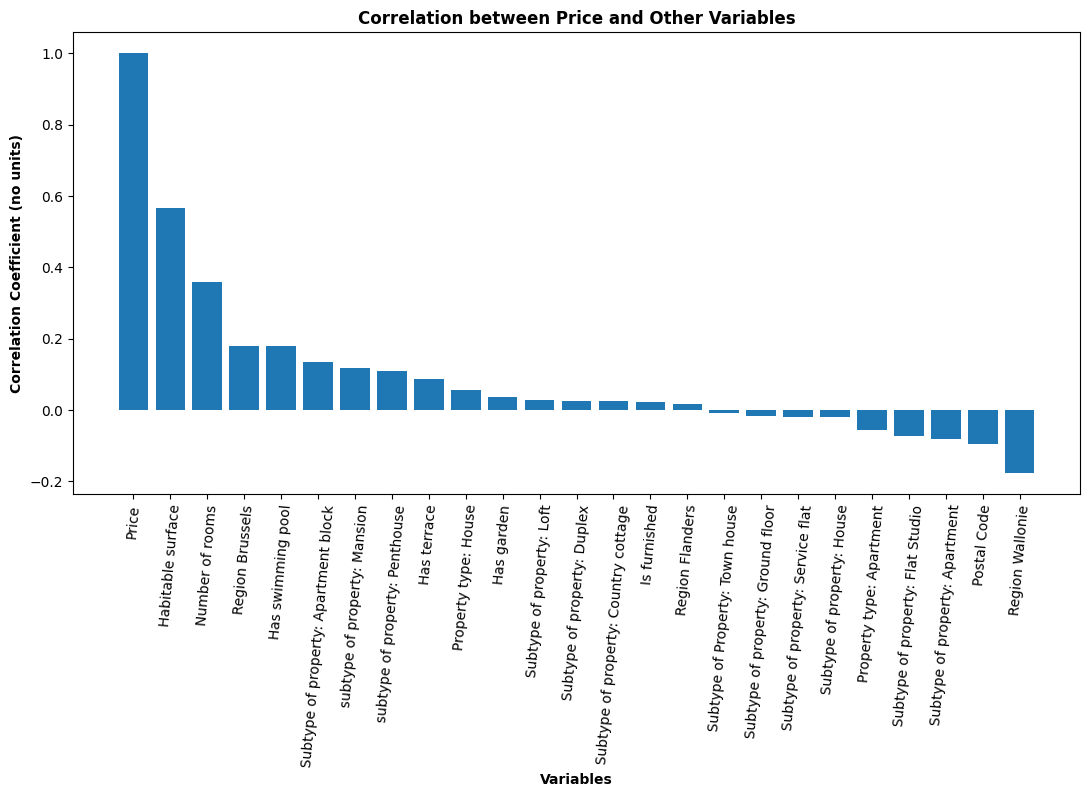

In [21]:
# Define categorical columns.
categorical_columns = ['region', 'property_type', 'subtype_property']

# Convert the categorical columns to numerical
encoded_data = pd.get_dummies(immo_dataset, columns=categorical_columns)

# Calculate the correlation using the Pearson method
pearson_corr = encoded_data.corr(method='pearson')

# Sort the correlation values in descending order
sorted_correlation = pearson_corr.sort_values(by='price',ascending=False)

# Plot a bar graph
plt.figure(figsize=(13, 6))
plt.bar(sorted_correlation.index, sorted_correlation['price'])
plt.xlabel('Variables', fontweight='bold')
plt.ylabel('Correlation Coefficient (no units)', fontweight='bold')
plt.title('Correlation between Price and Other Variables', fontweight='bold')
plt.xticks(ticks=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19,
                  20, 21, 22, 23, 24], labels=['Price', 'Habitable surface', 'Number of rooms',
                'Region Brussels', 'Has swimming pool', 'Subtype of property: Apartment block',
                'subtype of property: Mansion', 'subtype of property: Penthouse', 'Has terrace',
                'Property type: House', 'Has garden', 'Subtype of property: Loft',
                'Subtype of property: Duplex', 'Subtype of property: Country cottage',
                'Is furnished', 'Region Flanders', 'Subtype of Property: Town house',
                'Subtype of property: Ground floor', 'Subtype of property: Service flat',
                'Subtype of property: House', 'Property type: Apartment', 'Subtype of property: Flat Studio',
                'Subtype of property: Apartment', 'Postal Code', 'Region Wallonie'])
plt.xticks(rotation=85)
plt.show()


#### Define categorical columns and convert them to numerical.

In [22]:
categorical_columns = ['region', 'property_type', 'subtype_property']
encoded_data = pd.get_dummies(immo_dataset, columns=categorical_columns)

#### Plot Correlation Heatmap.

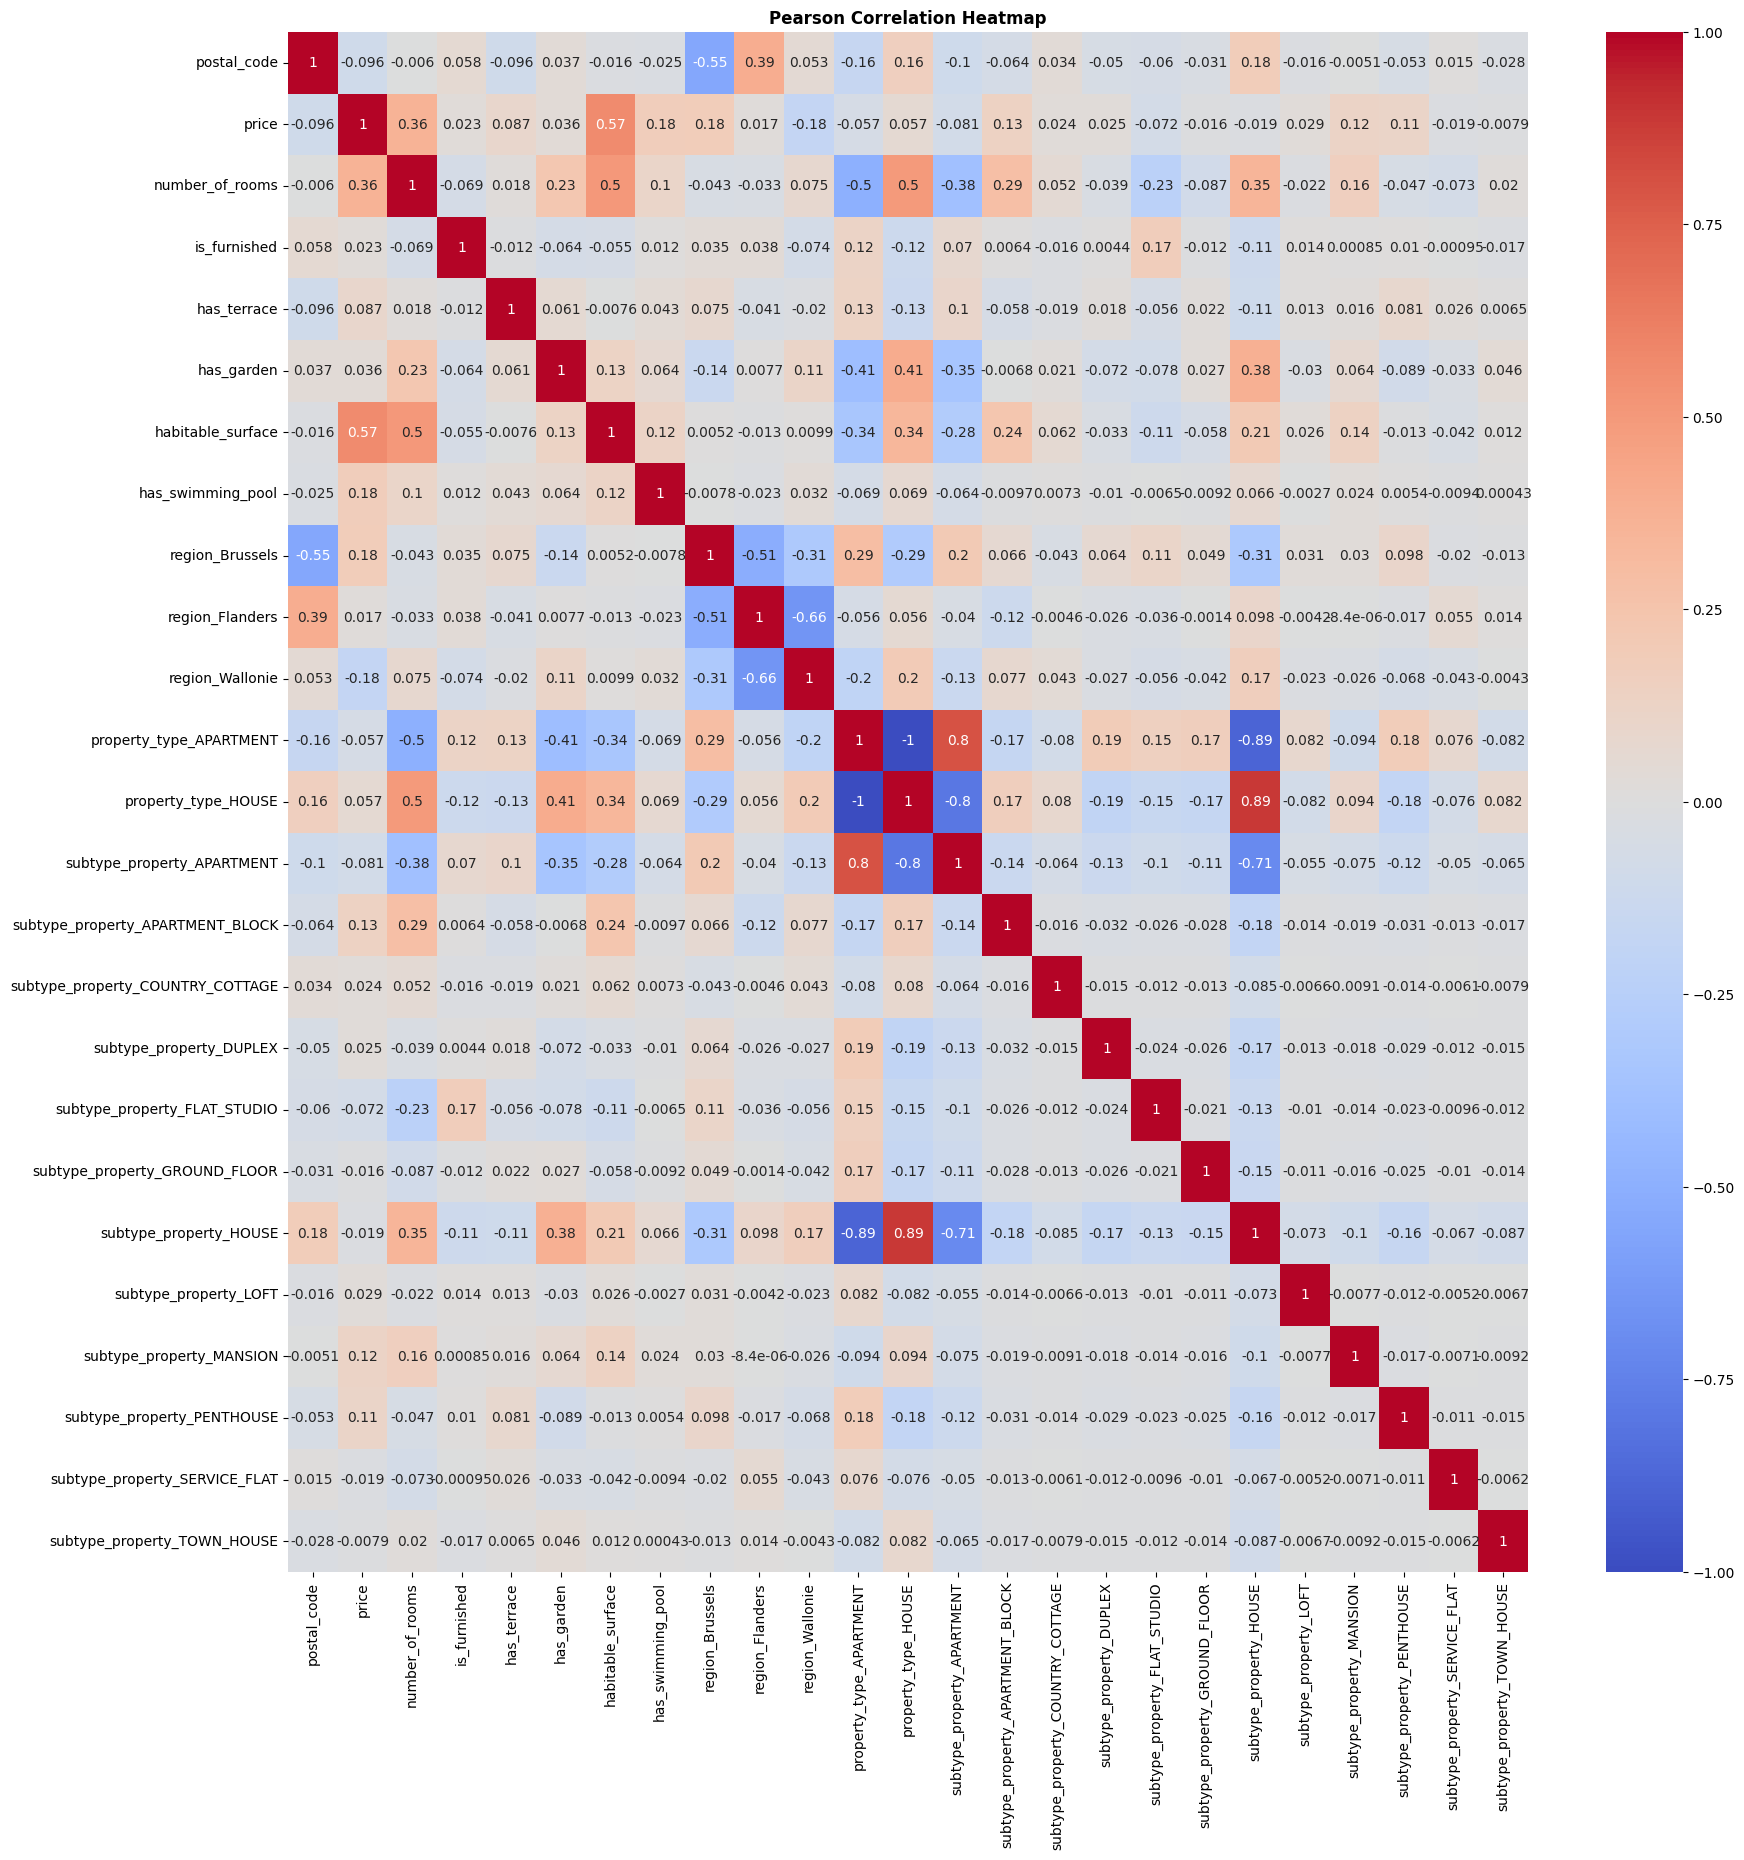

In [23]:
# Calculate the correlation using Pearson method
pearson_corr = encoded_data.corr(method='pearson')

# Plotting the correlation heatmap
plt.figure(figsize=(20, 20))
sns.heatmap(pearson_corr, annot=True, cmap='coolwarm')
plt.title('Pearson Correlation Heatmap', fontweight='bold')
plt.show()

### How are variables correlated to each other? 

#### The correlation of variables between them from stronger to weaker are (we are counting only positive correlations above 0.10, correlations are shown in parethenses):

**postal_code**: region_Flanders(0.39), subtype_property_House(0.18), property_type_House(0.16).

**price**: habitable_surface(0.57), number_of_rooms(0.36), has_swimming_pool(0.18), region_Brussels(0.18), subtype_property_Apartment_Block(0.13), subtype_property_Mansion(0.12), 
    subtype_property_Penthouse(0.11).

**Number_of_rooms**: habitable_surface(0.50), propety_type_House(0.50), subtype_property_House(0.35), subtype_property_Apartment_Block(0.29), has_garden(0.23), subtype_property_Mansion(0.16).

**is_furnished**: subtype_property_Flat_Studio(0.17), property_type_Apartment(0.12).

**has_terrace**: property_type_Apartment(0.13), subtype_property_Apartment(0.10).

**has_garden**: propety_type_House(0.41), subtype_property_House(0.38), habitable_surface(0.13), region_Wallonie(0.11).

**habitable_surface**: propety_type_House(0.34), subtype_property_Apartment_Block(0.24), subtype_property_House(0.21), subtype_property_Mansion(0.14), has_swimming_pool(0.12).

**region_Brussels**: property_type_Apartment(0.29), subtype_property_Apartment(0.20), subtype_property_Flat_Studio(0.11).

**region_Wallonie**: propety_type_House(0.20), subtype_property_House(0.17).

**property_type_Apartment**: subtype_property_Apartment(0.80), subtype_property_Duplex(0.19), subtype_property_Penthouse(0.18), subtype_property_Ground_floor(0.17), subtype_property_Flat_Studio(0.15).

**propety_type_House**: subtype_property_House(0.89), subtype_property_Apartment_Block(0.17).


#### Calculate correlation of all variables between them.

In [24]:
# Calculate correlation coefficient.
correlation_coefficient = encoded_data.corr()

# Print the correlation coefficients
print(correlation_coefficient)

                                  postal_code     price  number_of_rooms   
postal_code                          1.000000 -0.095958        -0.005998  \
price                               -0.095958  1.000000         0.359556   
number_of_rooms                     -0.005998  0.359556         1.000000   
is_furnished                         0.058435  0.023457        -0.069284   
has_terrace                         -0.095682  0.086930         0.018062   
has_garden                           0.037071  0.036090         0.227633   
habitable_surface                   -0.015977  0.566720         0.501742   
has_swimming_pool                   -0.025188  0.178072         0.101616   
region_Brussels                     -0.554118  0.179768        -0.042804   
region_Flanders                      0.392643  0.016652        -0.033382   
region_Wallonie                      0.052527 -0.176739         0.074699   
property_type_APARTMENT             -0.159548 -0.056660        -0.497414   
property_typ

### Which variables have the greatest influence on the price?

#### The variables with the most influence on property price are (from most to least):

**Habitable surface**

**Number of rooms**

**Presence of swimming pool**

**If the region is Brussels**

**If the subtype of the property is an Apartment Block**

**If the subtype of the property is a Mansion**

**If the subtype of the property is a Pentouse**

**Presence of terrace**

### Which variables have the least influence on the price?

#### The variables with the least influence on price are (from most to least):

**If the property type is a House**

**Presence of a garden**

**If the subtype of the property is a Loft**

**If the subtype of the property is a Duplex**

**If the subtype of the property is a Country Cottage**

**If the property is furnished**

**If the region is Flanders**

### How many qualitative and quantitative variables are there? How would you transform these values into numerical values?

#### We have seven quantitative and four qualitative variables.

#### We transformed the qualitative values to numerical by using the .get_dummies() pandas method.

In [25]:
immo_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13464 entries, 0 to 14717
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   postal_code        13464 non-null  object 
 1   region             13464 non-null  object 
 2   property_type      13464 non-null  object 
 3   subtype_property   13464 non-null  object 
 4   price              13464 non-null  int64  
 5   number_of_rooms    13464 non-null  int64  
 6   is_furnished       13464 non-null  int64  
 7   has_terrace        13464 non-null  int64  
 8   has_garden         13464 non-null  int64  
 9   habitable_surface  13464 non-null  float64
 10  has_swimming_pool  13464 non-null  int64  
dtypes: float64(1), int64(6), object(4)
memory usage: 1.2+ MB


## Step 3 : Data Interpretation

#### Plot the outliers.

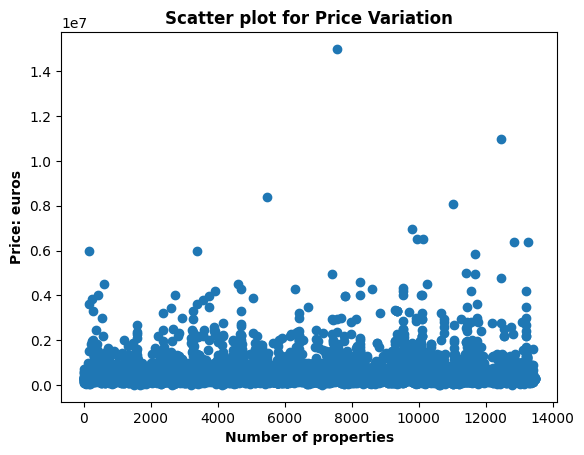

In [26]:
#Convert 'price' column to Pandas Series
price_series = pd.Series(immo_dataset['price'])

#Create the scatter plot
plt.scatter(range(len(price_series)), price_series)

#Set plot title and labels
plt.title('Scatter plot for Price Variation', fontweight='bold')
plt.xlabel('Number of properties', fontweight='bold')
plt.ylabel('Price: euros', fontweight='bold')
plt.show()

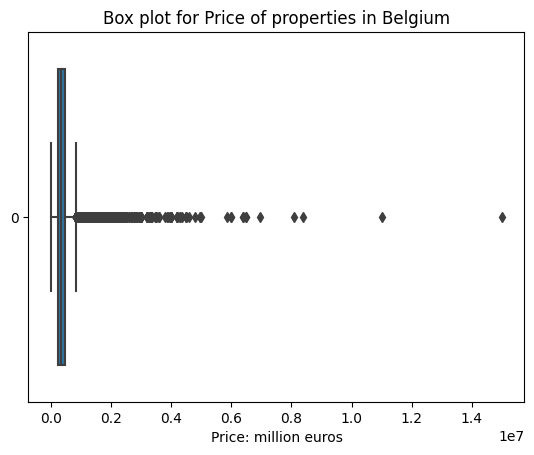

In [27]:
chart = sns.boxplot(data=immo_dataset['price'], orient='h')
chart.set_title('Box plot for Price of properties in Belgium')
chart.set_xlabel('Price: million euros')
plt.show()

In [28]:
immo_dataset.describe()

,price,number_of_rooms,is_furnished,has_terrace,has_garden,habitable_surface,has_swimming_pool
count,1.346400e+04,13464.000000,13464.000000,13464.000000,13464.000000,13464.000000,13464.000000
mean,4.286911e+05,2.897950,0.033720,0.666741,0.352347,161.910131,0.018048
std,4.516549e+05,1.536256,0.180513,0.471396,0.477719,146.650773,0.133130
min,2.500000e+03,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,2.300000e+05,2.000000,0.000000,0.000000,0.000000,95.000000,0.000000
50%,3.250000e+05,3.000000,0.000000,1.000000,0.000000,136.000000,0.000000
75%,4.720000e+05,3.000000,0.000000,1.000000,1.000000,193.000000,0.000000
max,1.500000e+07,27.000000,1.000000,1.000000,1.000000,8797.000000,1.000000


In [29]:
property_counts = immo_dataset['postal_code'].value_counts()
immo_dataset = immo_dataset[immo_dataset['postal_code'].isin(property_counts[property_counts >= 5].index)]
immo_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12670 entries, 0 to 14717
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   postal_code        12670 non-null  object 
 1   region             12670 non-null  object 
 2   property_type      12670 non-null  object 
 3   subtype_property   12670 non-null  object 
 4   price              12670 non-null  int64  
 5   number_of_rooms    12670 non-null  int64  
 6   is_furnished       12670 non-null  int64  
 7   has_terrace        12670 non-null  int64  
 8   has_garden         12670 non-null  int64  
 9   habitable_surface  12670 non-null  float64
 10  has_swimming_pool  12670 non-null  int64  
dtypes: float64(1), int64(6), object(4)
memory usage: 1.2+ MB


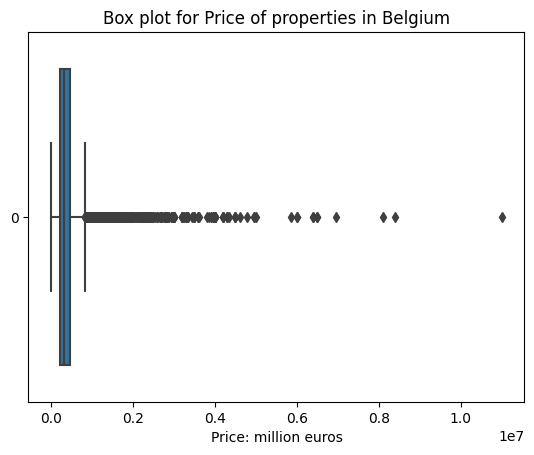

In [30]:
chart = sns.boxplot(data=immo_dataset['price'], orient='h')
chart.set_title('Box plot for Price of properties in Belgium')
chart.set_xlabel('Price: million euros')
plt.show()

In [31]:
immo_dataset.shape

(12670, 11)

#### Remove outliers using quantiles.

In [32]:
cols = ['price', 'number_of_rooms', 'habitable_surface']
Q1 = immo_dataset[cols].quantile(0.25)
Q3 = immo_dataset[cols].quantile(0.75)
IQR = Q3 - Q1
print('IQR: ', IQR)

IQR:  price                243000.0
number_of_rooms           1.0
habitable_surface        97.0
dtype: float64


In [33]:

immo_dataset = immo_dataset[~((immo_dataset[cols] <= (Q1 - 1.5 * IQR)) | (immo_dataset[cols] >= (Q3 + 1.5 * IQR))).any(axis=1)]
immo_dataset.describe()

,price,number_of_rooms,is_furnished,has_terrace,has_garden,habitable_surface,has_swimming_pool
count,10510.000000,10510.000000,10510.000000,10510.000000,10510.000000,10510.000000,10510.000000
mean,330729.920552,2.537678,0.031779,0.669838,0.333777,131.876118,0.009895
std,150384.775519,0.896944,0.175420,0.470294,0.471584,56.025420,0.098987
min,2500.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,224000.000000,2.000000,0.000000,0.000000,0.000000,90.000000,0.000000
50%,299000.000000,3.000000,0.000000,1.000000,0.000000,120.000000,0.000000
75%,403625.000000,3.000000,0.000000,1.000000,1.000000,165.000000,0.000000
max,839475.000000,4.000000,1.000000,1.000000,1.000000,331.000000,1.000000


In [34]:
immo_dataset.shape

(10510, 11)

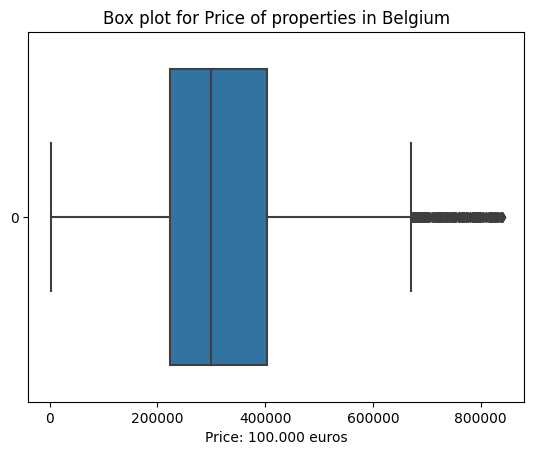

In [35]:
chart = sns.boxplot(data=immo_dataset['price'], orient='h')
chart.set_title('Box plot for Price of properties in Belgium')
chart.set_xlabel('Price: 100.000 euros')
plt.show()

In [36]:
immo_dataset['price'].sort_values().unique()

array([  2500,  10000,  16000, ..., 835000, 839000, 839475])

In [37]:
immo_dataset['habitable_surface'].sort_values().unique()

array([  1.,   9.,  16.,  17.,  20.,  21.,  22.,  23.,  25.,  26.,  27.,
        28.,  29.,  30.,  31.,  32.,  33.,  34.,  35.,  36.,  37.,  38.,
        39.,  40.,  41.,  42.,  43.,  44.,  45.,  46.,  47.,  48.,  49.,
        50.,  51.,  52.,  53.,  54.,  55.,  56.,  57.,  58.,  59.,  60.,
        61.,  62.,  63.,  64.,  65.,  66.,  67.,  68.,  69.,  70.,  71.,
        72.,  73.,  74.,  75.,  76.,  77.,  78.,  79.,  80.,  81.,  82.,
        83.,  84.,  85.,  86.,  87.,  88.,  89.,  90.,  91.,  92.,  93.,
        94.,  95.,  96.,  97.,  98.,  99., 100., 101., 102., 103., 104.,
       105., 106., 107., 108., 109., 110., 111., 112., 113., 114., 115.,
       116., 117., 118., 119., 120., 121., 122., 123., 124., 125., 126.,
       127., 128., 129., 130., 131., 132., 133., 134., 135., 136., 137.,
       138., 139., 140., 141., 142., 143., 144., 145., 146., 147., 148.,
       149., 150., 151., 152., 153., 154., 155., 156., 157., 158., 159.,
       160., 161., 162., 163., 164., 165., 166., 16

In [38]:
immo_dataset[immo_dataset['habitable_surface'] <= 25]

,postal_code,region,property_type,subtype_property,price,number_of_rooms,is_furnished,has_terrace,has_garden,habitable_surface,has_swimming_pool
158,4030,Wallonie,APARTMENT,FLAT_STUDIO,62500,1,0,0,0,25.0,0
687,4100,Wallonie,APARTMENT,APARTMENT,145000,1,1,0,0,17.0,0
1430,2000,Flanders,APARTMENT,FLAT_STUDIO,115000,1,0,0,0,16.0,0
1890,4000,Wallonie,APARTMENT,APARTMENT,125000,1,0,1,0,22.0,0
2847,1050,Brussels,APARTMENT,APARTMENT,120000,1,0,0,0,25.0,0
6479,4020,Wallonie,APARTMENT,APARTMENT,224000,2,0,1,0,9.0,0
6566,5030,Wallonie,APARTMENT,APARTMENT,115000,1,0,0,0,25.0,0
6571,8434,Flanders,APARTMENT,APARTMENT,99000,1,0,1,0,25.0,0
7297,3000,Flanders,APARTMENT,FLAT_STUDIO,275000,1,1,0,0,25.0,0
8720,8420,Flanders,APARTMENT,APARTMENT,99000,1,0,1,1,23.0,0


In [39]:
immo_dataset['price'].sort_values().unique()

array([  2500,  10000,  16000, ..., 835000, 839000, 839475])

In [40]:
immo_dataset[immo_dataset['price'] <= 29000]

,postal_code,region,property_type,subtype_property,price,number_of_rooms,is_furnished,has_terrace,has_garden,habitable_surface,has_swimming_pool
1603,6900,Wallonie,APARTMENT,APARTMENT,20000,1,0,0,0,55.0,0
1819,1932,Flanders,APARTMENT,APARTMENT,20000,2,0,1,0,91.0,0
2843,4400,Wallonie,HOUSE,HOUSE,20000,3,0,1,0,130.0,0
3448,4040,Wallonie,APARTMENT,APARTMENT,10000,1,0,0,0,58.0,0
4258,4180,Wallonie,HOUSE,HOUSE,25000,3,0,0,0,140.0,0
4448,2800,Flanders,HOUSE,HOUSE,2500,3,1,0,0,220.0,0
11571,4607,Wallonie,APARTMENT,APARTMENT,25000,1,0,1,0,82.0,0
11574,4000,Wallonie,APARTMENT,APARTMENT,10000,2,0,1,0,75.0,0
11611,6238,Wallonie,HOUSE,HOUSE,16000,3,0,1,1,181.0,0
12873,6941,Wallonie,HOUSE,HOUSE,25000,1,0,0,0,50.0,0


In [41]:
immo_dataset.drop(immo_dataset[(immo_dataset['price'] < 20000) | (immo_dataset['habitable_surface'] < 25)].index, inplace=True)
immo_dataset.describe()

,price,number_of_rooms,is_furnished,has_terrace,has_garden,habitable_surface,has_swimming_pool
count,10495.000000,10495.000000,10495.000000,10495.000000,10495.000000,10495.000000,10495.000000
mean,331047.400667,2.539019,0.031444,0.670224,0.333873,131.995141,0.009814
std,150208.973882,0.896161,0.174521,0.470154,0.471618,55.926899,0.098584
min,20000.000000,1.000000,0.000000,0.000000,0.000000,25.000000,0.000000
25%,224983.000000,2.000000,0.000000,0.000000,0.000000,90.000000,0.000000
50%,299000.000000,3.000000,0.000000,1.000000,0.000000,121.000000,0.000000
75%,405000.000000,3.000000,0.000000,1.000000,1.000000,165.000000,0.000000
max,839475.000000,4.000000,1.000000,1.000000,1.000000,331.000000,1.000000


In [42]:
cols = ['price', 'number_of_rooms', 'habitable_surface']
Q1 = immo_dataset[cols].quantile(0.25)
Q3 = immo_dataset[cols].quantile(0.75)
IQR = Q3 - Q1
print('IQR: ', IQR)

IQR:  price                180017.0
number_of_rooms           1.0
habitable_surface        75.0
dtype: float64


In [43]:
immo_dataset = immo_dataset[~((immo_dataset[cols] <= (Q1 - 1.5 * IQR)) | (immo_dataset[cols] >= (Q3 + 1.5 * IQR))).any(axis=1)]
immo_dataset.describe()

,price,number_of_rooms,is_furnished,has_terrace,has_garden,habitable_surface,has_swimming_pool
count,9956.000000,9956.000000,9956.000000,9956.000000,9956.000000,9956.000000,9956.000000
mean,313883.689735,2.505826,0.031037,0.666633,0.328847,127.209522,0.007734
std,128376.108412,0.891202,0.173425,0.471440,0.469818,50.702270,0.087607
min,20000.000000,1.000000,0.000000,0.000000,0.000000,25.000000,0.000000
25%,219000.000000,2.000000,0.000000,0.000000,0.000000,89.000000,0.000000
50%,295000.000000,3.000000,0.000000,1.000000,0.000000,120.000000,0.000000
75%,395000.000000,3.000000,0.000000,1.000000,1.000000,160.000000,0.000000
max,675000.000000,4.000000,1.000000,1.000000,1.000000,277.000000,1.000000


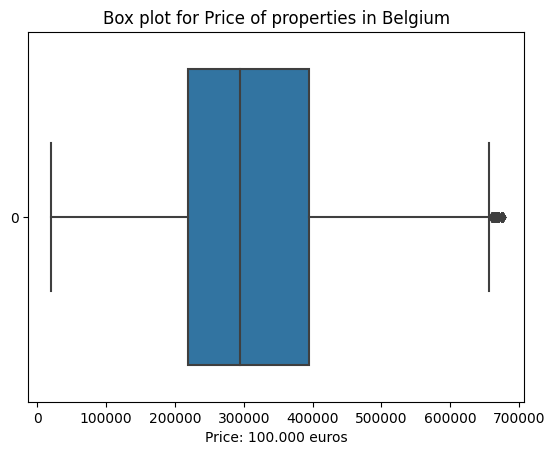

In [44]:
chart = sns.boxplot(data=immo_dataset['price'], orient='h')
chart.set_title('Box plot for Price of properties in Belgium')
chart.set_xlabel('Price: 100.000 euros')
plt.show()

In [45]:
immo_dataset.shape

(9956, 11)

### Which variables would you delete and why ?


#### We deleted the following variables beacause they had a significant percentage of missing values:
 'contruction_year', 'energy_class', 'living_area', 'kitchen_fully_equiped', 'terrace_area', 'garden_surface', 'plot_land_surface', 'number_of_facades', 'building_state'


#### We deleted the following variables beacause they had no significant influence on the price of properties:
'type_of_sale', 'has_open_fire'. 


#### We deleted the following variable because it wasn't useful to our analysis, we used postal code instead.
'locality'.



### Represent the number of properties according to their surface using a histogram.


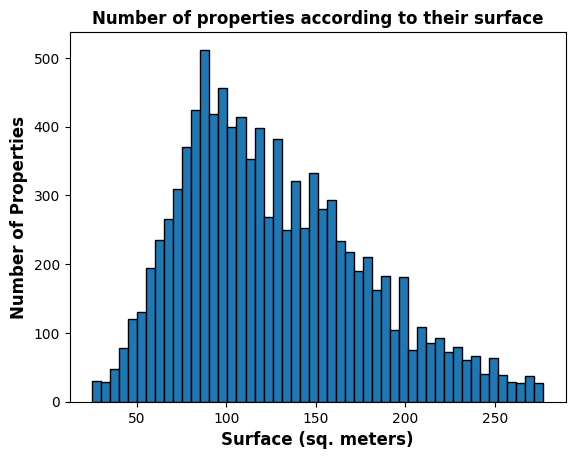

In [46]:
# Extract the 'habitable_surface' data
surface = immo_dataset['habitable_surface']

# Create the histogram
plt.hist(surface, bins=50, edgecolor='black')

# Label the axes and add a title
plt.xlabel('Surface (sq. meters)',fontsize=12, fontweight='bold')
plt.ylabel('Number of Properties',fontsize=12, fontweight='bold')
plt.title('Number of properties according to their surface', fontweight='bold')
plt.show()



### In your opinion, which 5 variables are the most important and why?


#### The variables with the most influence on property price are:

**Habitable surface**: the biggest the surface the biggest the price.

**Number of rooms**: construction cost increases as the number of room increases.

**Presence of swimming pool**: it is a luxury.

**Region: Brussels**: great population density -> higher demand over supply

**the subtype of the property is an Apartment Block**: it consists of more than one apartment.

#### Calculate price per square meter column.

In [47]:
immo_dataset['price_per_sqm'] = immo_dataset['price'] / immo_dataset['habitable_surface']

### What are the most expensive municipalities in Belgium? (Average price, median price, price per square meter)

#### Calulate mean and median for the most expensive municipalities in Belgium.

In [48]:
# Group by postal code and calculate the average price, median price, and price per square meter
country_mean_median = immo_dataset.groupby('postal_code').agg(
    average_price=('price', 'mean'),
    median_price=('price', 'median')    
)

# Sort by postal code (index) in ascending order
sorted_postal_codes = country_mean_median.sort_index()

# Sort the postal codes (municipalities) based on the average price in descending order
most_expensive_municipalities = country_mean_median.sort_values(by='average_price', ascending=False).head(10)

# Print the most expensive regions and their corresponding statistics
print("Most Expensive Municipalities in Belgium:")
print(most_expensive_municipalities)

Most Expensive Municipalities in Belgium:
             average_price  median_price
postal_code                             
8300         526900.446429      559500.0
1950         519705.882353      545000.0
1380         514333.333333      515000.0
1325         480263.157895      460000.0
9820         472444.444444      537000.0
2811         471000.000000      495000.0
1910         468333.333333      495000.0
1860         463000.000000      465000.0
1850         461333.333333      522000.0
1150         453323.376623      450000.0


#### Bar plot for mean and median for the most expensive municipalities in Belgium.

##### Function to match municipality (locality) to postal code 

In [49]:
def match_municipality(postal_code: str) -> str:
    print(municipalities[municipalities['postal_code'] == postal_code])

##### Match municipalities for postal cods of plot. 

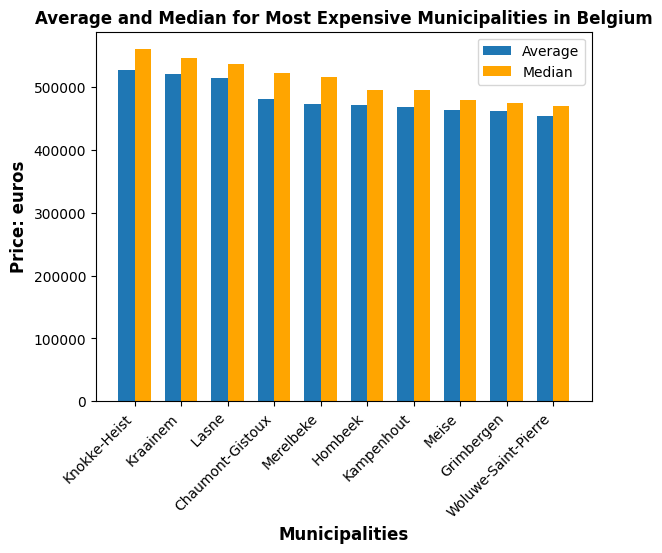

In [50]:
# Sort the postal codes based on the average price in ascending order
most_expensive_postal_codes_average = country_mean_median.nlargest(10, 'average_price')
most_expensive_postal_codes_median = country_mean_median.nlargest(10, 'median_price')

# Set bar plot
labels = most_expensive_postal_codes_average.index
x = np.arange(len(labels))
fig, ax = plt.subplots()
width = 0.35
ax.bar(x - width/2, most_expensive_postal_codes_average['average_price'], width, label='Average')
ax.bar(x + width/2, most_expensive_postal_codes_median['median_price'], width, label='Median', color='orange')
ax.set_xlabel('Municipalities', fontsize=12, fontweight='bold')
ax.set_ylabel('Price: euros', fontsize=12, fontweight='bold')
ax.set_title('Average and Median for Most Expensive Municipalities in Belgium', fontweight='bold')
ax.set_xticks(ticks=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
ax.set_xticklabels(labels=['Knokke-Heist', 'Kraainem',
            ' Lasne', 'Chaumont-Gistoux', 'Merelbeke', 'Hombeek', 'Kampenhout', 'Meise', 'Grimbergen',
            'Woluwe-Saint-Pierre'], rotation=45, ha='right')

ax.legend()
plt.show()

Bar plot for price per sqare meter for the most expensive municipalities in Belgium.

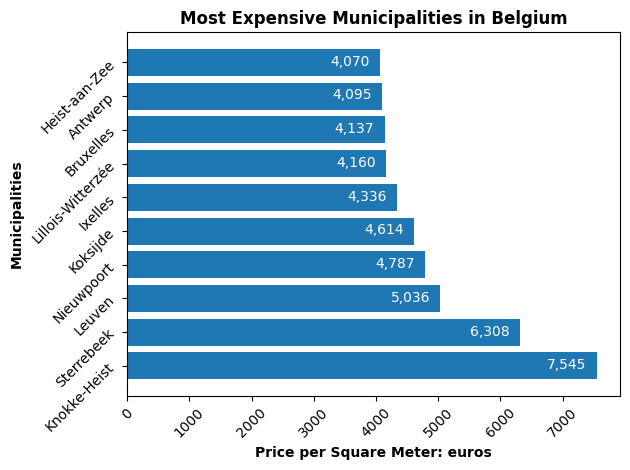

In [51]:
# Group by postal code and calculate the price per square meter
country_mean_median_psqm = immo_dataset.groupby('postal_code').agg(
    average_price=('price', 'mean'),
    median_price=('price', 'median'),
    price_per_sqm=('price_per_sqm', 'mean')
)
# Get the most expensive postal codes
most_expensive_postal_codes = country_mean_median_psqm.nlargest(10, 'price_per_sqm')

# Extract the price per square meter values
price_per_square_meter_values = most_expensive_postal_codes['price_per_sqm']

# Set bar plot
labels = most_expensive_postal_codes.index
fig, ax = plt.subplots()
width = 0.35
ax.barh(labels, price_per_square_meter_values)
ax.set_xlabel('Price per Square Meter: euros', fontweight='bold')
ax.set_ylabel('Municipalities', fontweight='bold')
ax.set_title('Most Expensive Municipalities in Belgium', fontweight='bold')
ax.tick_params(axis='x', rotation=45)
ax.set_yticks(ticks=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
ax.set_yticklabels(labels=['Knokke-Heist', 'Sterrebeek',
            'Leuven', 'Nieuwpoort', 'Koksijde', 'Ixelles', 'Lillois-Witterzée', 'Bruxelles', 'Antwerp',
            'Heist-aan-Zee'], rotation=45, ha='right')
for index, value in enumerate(price_per_square_meter_values):
    label = format(int(value), ',')
    plt.annotate(label, xy=(value-800, index-0.1), color='white')
plt.tight_layout()
plt.show()

What are the most expensive municipalities in Wallonia? (Average price, median price, price per square meter)


Filter the dataset for Wallonia.

In [52]:
wallonia_dataset = immo_dataset[immo_dataset['region'] == 'Wallonie']

Bar plot for mean and median for the most expensive municilapities in Wallonia.

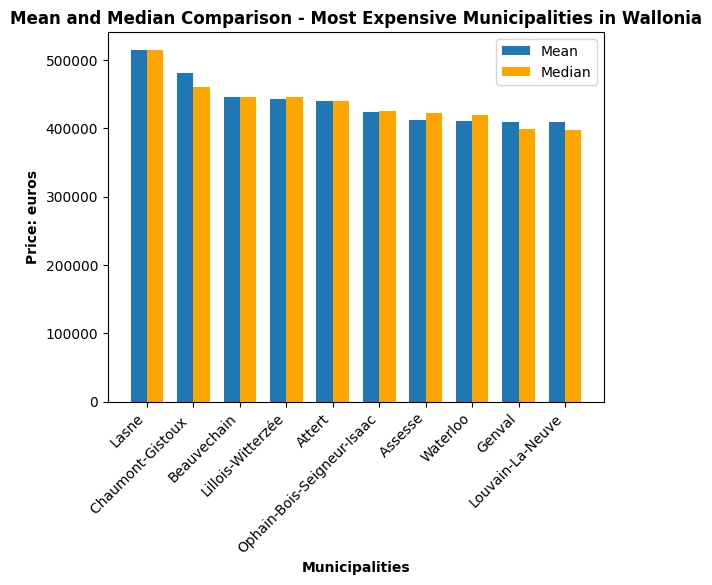

In [53]:
# Group by postal code and calculate the average price andmedian price
wallonia_mean_median = wallonia_dataset.groupby('postal_code').agg(
    average_price=('price', 'mean'),
    median_price=('price', 'median'),
)
# Sort the postal codes based on the average price in ascending order
most_expensive_postal_codes_average = wallonia_mean_median.nlargest(10, 'average_price')
most_expensive_postal_codes_median = wallonia_mean_median.nlargest(10, 'median_price')

# Set bar plot
labels = most_expensive_postal_codes_average.index
x = np.arange(len(labels))
fig, ax = plt.subplots()
width = 0.35
ax.bar(x - width/2, most_expensive_postal_codes_average['average_price'], width, label='Mean')
ax.bar(x + width/2, most_expensive_postal_codes_median['median_price'], width, label='Median', color='orange')
ax.set_xlabel('Municipalities', fontweight='bold')
ax.set_ylabel('Price: euros', fontweight='bold')
ax.set_title('Mean and Median Comparison - Most Expensive Municipalities in Wallonia', fontweight='bold')
ax.set_xticks(ticks=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
ax.set_xticklabels(labels=['Lasne', 'Chaumont-Gistoux ',
            'Beauvechain', 'Lillois-Witterzée', 'Attert', 'Ophain-Bois-Seigneur-Isaac', ' Assesse', 'Waterloo', 'Genval',
            'Louvain-La-Neuve'], rotation=45, ha='right')
ax.legend()
plt.show()


Bar plot for price per square meter for most expensive municipalities in Wallonia.

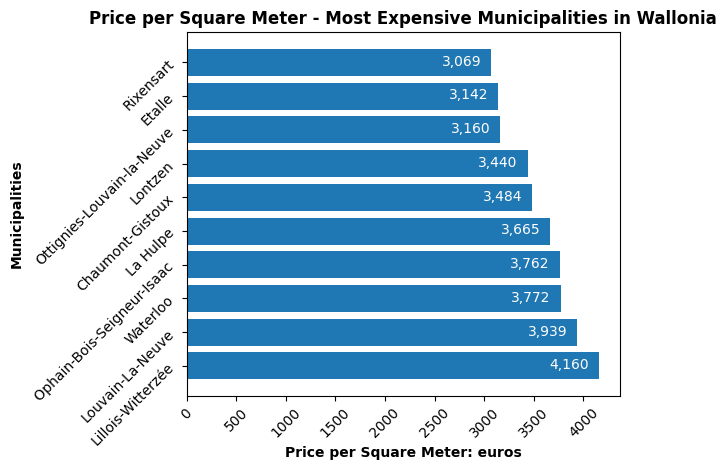

In [54]:
# Group by postal code and calculate the average price, median price, and price per square meter
wallonia_mean_median_psqm = wallonia_dataset.groupby('postal_code').agg(
    average_price=('price', 'mean'),
    median_price=('price', 'median'),
    price_per_sqm=('price_per_sqm', 'mean')
)
# Get the least expensive postal codes
most_expensive_postal_codes = wallonia_mean_median_psqm.nlargest(10, 'price_per_sqm')

# Extract the price per square meter values 
price_per_square_meter_values = most_expensive_postal_codes['price_per_sqm']

# Set bar plot
labels = most_expensive_postal_codes.index
fig, ax = plt.subplots()
width = 0.35
ax.barh(labels, price_per_square_meter_values)
ax.set_xlabel('Price per Square Meter: euros', fontweight='bold')
ax.set_ylabel('Municipalities', fontweight='bold')
ax.set_title('Price per Square Meter - Most Expensive Municipalities in Wallonia', fontweight='bold')
ax.tick_params(axis='x', rotation=45)
ax.set_yticks(ticks=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
ax.set_yticklabels(labels=['Lillois-Witterzée', 'Louvain-La-Neuve',
            'Waterloo', ' Ophain-Bois-Seigneur-Isaac', 'La Hulpe', 'Chaumont-Gistoux', 'Lontzen', 'Ottignies-Louvain-la-Neuve', 'Etalle',
            'Rixensart'], rotation=45, ha='right')

for index, value in enumerate(price_per_square_meter_values):
    label = format(int(value), ',')
    plt.annotate(label, xy=(value-500, index-0.1), color='white')
plt.tight_layout()
plt.show()

What are the most expensive municipalities in Flanders? (Average price, median price, price per square meter)


Filter the dataset for Flanders.

In [55]:
flanders_dataset = immo_dataset[immo_dataset['region'] == 'Flanders']

Bar plot for mean and median for most expensive municipalities in Flanders.

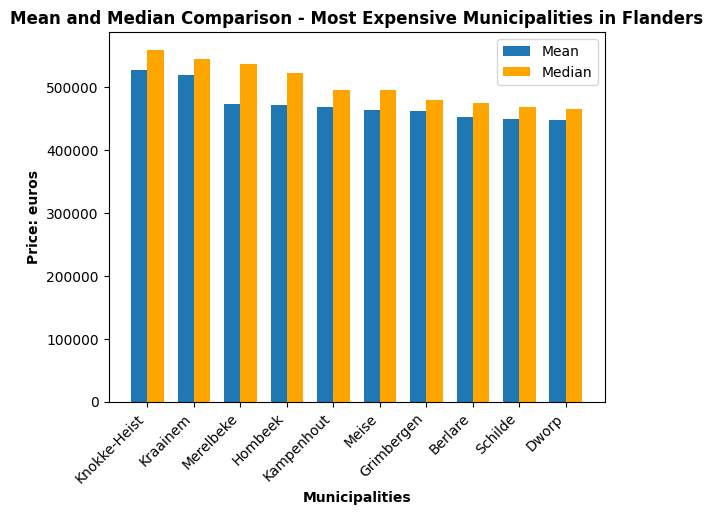

In [56]:
# Group by postal code and calculate the average price, median price
flanders_mean_median = flanders_dataset.groupby('postal_code').agg(
    average_price=('price', 'mean'),
    median_price=('price', 'median'),
)
# Sort the postal codes based on the average price in ascending order
most_expensive_postal_codes_average = flanders_mean_median.nlargest(10, 'average_price')
most_expensive_postal_codes_median = flanders_mean_median.nlargest(10, 'median_price')

# Set bar plot
labels = most_expensive_postal_codes_average.index
x = np.arange(len(labels))
fig, ax = plt.subplots()
width = 0.35
ax.bar(x - width/2, most_expensive_postal_codes_average['average_price'], width, label='Mean')
ax.bar(x + width/2, most_expensive_postal_codes_median['median_price'], width, label='Median', color='orange')
ax.set_xlabel('Municipalities', fontweight='bold')
ax.set_ylabel('Price: euros', fontweight='bold')
ax.set_title('Mean and Median Comparison - Most Expensive Municipalities in Flanders', fontweight='bold')
ax.set_xticks(ticks=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
ax.set_xticklabels(labels=['Knokke-Heist', 'Kraainem',
            'Merelbeke', 'Hombeek', 'Kampenhout', 'Meise', 'Grimbergen', 'Berlare', 'Schilde',
            'Dworp'], rotation=45, ha='right')
ax.legend()
plt.show()

Bar plot for price per square meter for most expensive municipalities in Flanders.

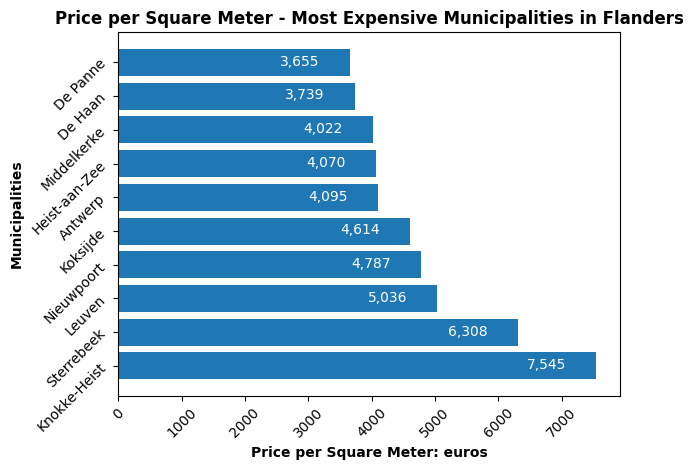

In [57]:
# Group by postal code and calculate the price per square meter
flanders_mean_median_psqm = flanders_dataset.groupby('postal_code').agg(
    average_price=('price', 'mean'),
    median_price=('price', 'median'),
    price_per_sqm=('price_per_sqm', 'mean')
)
# Get the least expensive postal codes
most_expensive_postal_codes = flanders_mean_median_psqm.nlargest(10, 'price_per_sqm')

# Extract the price per square meter values 
price_per_square_meter_values = most_expensive_postal_codes['price_per_sqm']

# Set bar plot
labels = most_expensive_postal_codes.index
fig, ax = plt.subplots()
width = 0.35
ax.barh(labels, price_per_square_meter_values)
ax.set_xlabel('Price per Square Meter: euros', fontweight='bold')
ax.set_ylabel('Municipalities', fontweight='bold')
ax.set_title('Price per Square Meter - Most Expensive Municipalities in Flanders', fontweight='bold')
ax.tick_params(axis='x', rotation=45)
ax.set_yticks(ticks=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
ax.set_yticklabels(labels=['Knokke-Heist', 'Sterrebeek',
            'Leuven', 'Nieuwpoort', 'Koksijde', 'Antwerp', 'Heist-aan-Zee', 'Middelkerke', 'De Haan',
            'De Panne'], rotation=45, ha='right')
for index, value in enumerate(price_per_square_meter_values):
    label = format(int(value), ',')
    plt.annotate(label, xy=(value-1100, index-0.1), color='white')
plt.tight_layout()
plt.show()

What are the less expensive municipalities in Belgium? (Average price, median price, price per square meter)


Calculate mean and median for least expensive municipalities in Belgium.

In [58]:
# Sort the postal codes by average price in descending order
least_expensive_municipalities = country_mean_median.sort_values(by='average_price', ascending=True).head(10)

# Print the most expensive municipalities and their corresponding statistics
print("Least Expensive Municilapities in Belgium:")
print(least_expensive_municipalities)


Least Expensive Municilapities in Belgium:
             average_price  median_price
postal_code                             
5540          92554.444444       65000.0
4820         102187.500000      107000.0
4900         120571.285714       85000.0
7390         125699.800000      122500.0
7141         126600.000000      109000.0
4624         133800.000000      100000.0
7370         136357.142857      137500.0
7340         138833.250000      142000.0
6001         140437.500000      117500.0
6031         151433.333333      135000.0


Bar plot for mean and median for least expensive municipalities in Belgium.

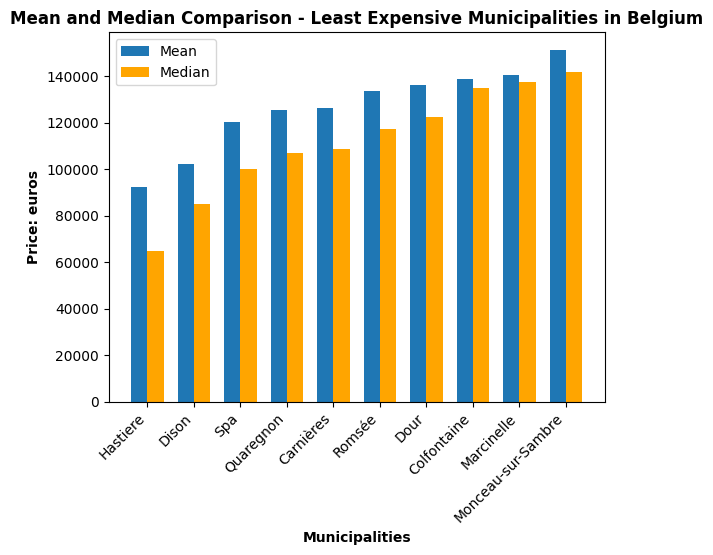

In [59]:
# Sort the postal codes by average price and median in ascending order
least_expensive_postal_codes_average = country_mean_median.nsmallest(10, 'average_price')
least_expensive_postal_codes_median = country_mean_median.nsmallest(10, 'median_price')

# Set bar plot
labels = least_expensive_postal_codes_average.index
x = np.arange(len(labels))
fig, ax = plt.subplots()
width = 0.35
ax.bar(x - width/2, least_expensive_postal_codes_average['average_price'], width, label='Mean')
ax.bar(x + width/2, least_expensive_postal_codes_median['median_price'], width, label='Median', color='orange')
ax.set_xlabel('Municipalities', fontweight='bold')
ax.set_ylabel('Price: euros', fontweight='bold')
ax.set_title('Mean and Median Comparison - Least Expensive Municipalities in Belgium', fontweight='bold')
ax.set_xticks(ticks=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
ax.set_xticklabels(labels=['Hastiere', 'Dison',
            'Spa', 'Quaregnon', 'Carnières', 'Romsée', 'Dour', 'Colfontaine', 'Marcinelle',
            'Monceau-sur-Sambre'], rotation=45, ha='right')
ax.legend()
plt.show()

Bar plot for price per square meter for least expensive municipalities in Belgium.

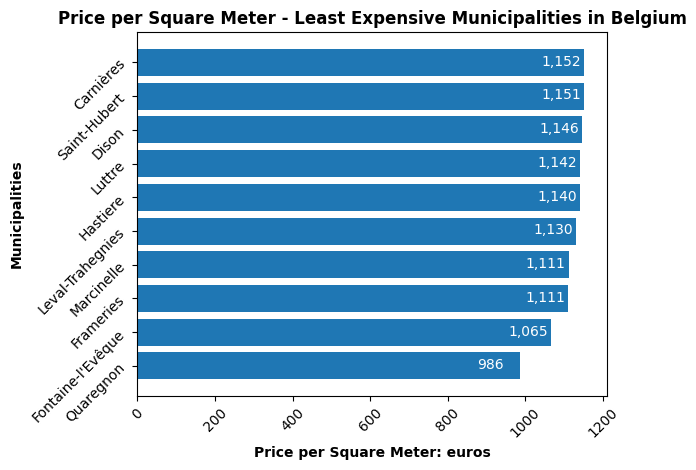

In [60]:
# Get the least expensive postal codes
least_expensive_postal_codes = country_mean_median_psqm.nsmallest(10, 'price_per_sqm')

# Extract the price per square meter values 
price_per_square_meter_values = least_expensive_postal_codes['price_per_sqm']

# Set bar plot
labels = least_expensive_postal_codes.index
fig, ax = plt.subplots()
width = 0.35
ax.barh(labels, price_per_square_meter_values)
ax.set_xlabel('Price per Square Meter: euros', fontweight='bold')
ax.set_ylabel('Municipalities', fontweight='bold')
ax.set_title('Price per Square Meter - Least Expensive Municipalities in Belgium', fontweight='bold')
ax.tick_params(axis='x', rotation=45)
ax.set_yticks(ticks=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
ax.set_yticklabels(labels=['Quaregnon', "Fontaine-l'Evêque",
            'Frameries', 'Marcinelle', 'Leval-Trahegnies', 'Hastiere', 'Luttre', 'Dison', 'Saint-Hubert',
            'Carnières'], rotation=45, ha='right')
for index, value in enumerate(price_per_square_meter_values):
    label = format(int(value), ',')
    plt.annotate(label, xy=(value-110, index-0.1), color='white')
plt.tight_layout()
plt.show()

What are the less expensive municipalities in Wallonia? (Average price, median price, price per square meter)


Bar plot for mean and median for least expensive municipalities for Wallonia.

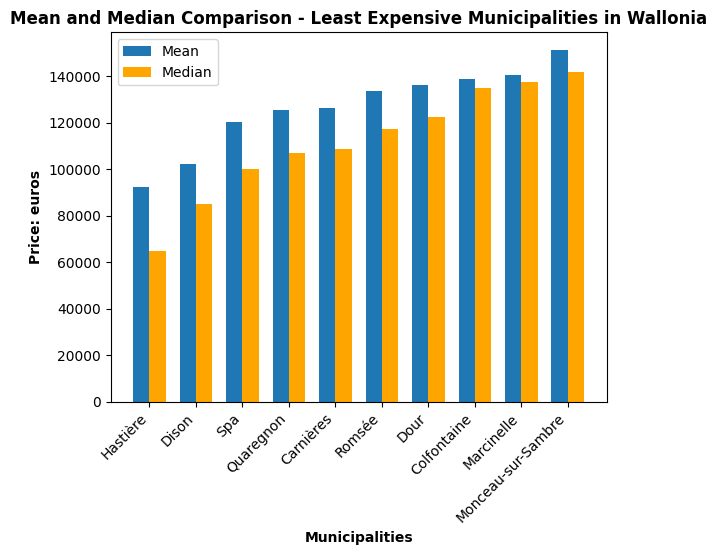

In [61]:
# Sort the postal codesby average and median price in ascending order
least_expensive_postal_codes_average = wallonia_mean_median.nsmallest(10, 'average_price')
least_expensive_postal_codes_median = wallonia_mean_median.nsmallest(10, 'median_price')

# Set bar plot
labels = least_expensive_postal_codes_average.index
x = np.arange(len(labels))
fig, ax = plt.subplots()
width = 0.35
ax.bar(x - width/2, least_expensive_postal_codes_average['average_price'], width, label='Mean',)
ax.bar(x + width/2, least_expensive_postal_codes_median['median_price'], width, label='Median', color='orange')
ax.set_xlabel('Municipalities', fontweight='bold')
ax.set_ylabel('Price: euros', fontweight='bold')
ax.set_title('Mean and Median Comparison - Least Expensive Municipalities in Wallonia', fontweight='bold')
ax.set_xticks(ticks=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
ax.set_xticklabels(labels=['Hastière', 'Dison',
            'Spa', 'Quaregnon', 'Carnières', 'Romsée', 'Dour', 'Colfontaine', 'Marcinelle',
            'Monceau-sur-Sambre'], rotation=45, ha='right')
ax.legend()
plt.show()

Bar plot for price per square meter for least expensive municipalities for Wallonia.

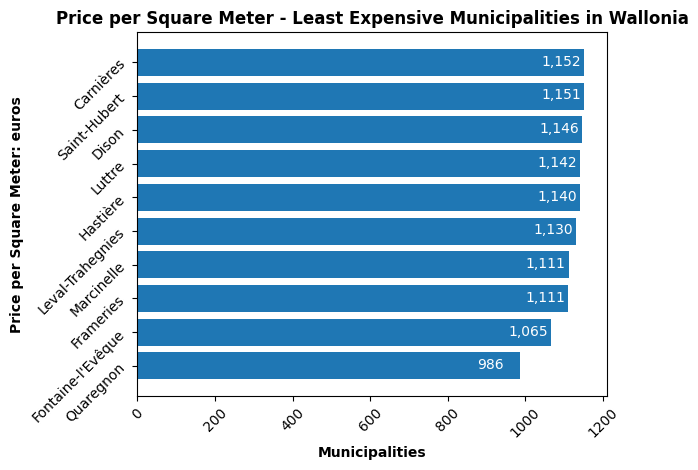

In [62]:
# Get the least expensive postal codes
least_expensive_postal_codes = wallonia_mean_median_psqm.nsmallest(10, 'price_per_sqm')

# Extract the price per square meter values 
price_per_square_meter_values = least_expensive_postal_codes['price_per_sqm']

# Set bar plot
labels = least_expensive_postal_codes.index
fig, ax = plt.subplots()
width = 0.35
ax.barh(labels, price_per_square_meter_values)
ax.set_xlabel('Municipalities', fontweight='bold')
ax.set_ylabel('Price per Square Meter: euros', fontweight='bold')
ax.set_title('Price per Square Meter - Least Expensive Municipalities in Wallonia', fontweight='bold')
ax.tick_params(axis='x', rotation=45)
ax.set_yticks(ticks=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
ax.set_yticklabels(labels=['Quaregnon', "Fontaine-l'Evêque",
            'Frameries', 'Marcinelle', 'Leval-Trahegnies', 'Hastière', 'Luttre', 'Dison', 'Saint-Hubert',
            'Carnières'], rotation=45, ha='right')
for index, value in enumerate(price_per_square_meter_values):
    label = format(int(value), ',')
    plt.annotate(label, xy=(value-110, index-0.1), color='white')
plt.tight_layout()
plt.show()

What are the less expensive municipalities in Flanders? (Average price, median price, price per square meter)


Bar plot for mean and median for least expensive municipalities for Flanders.

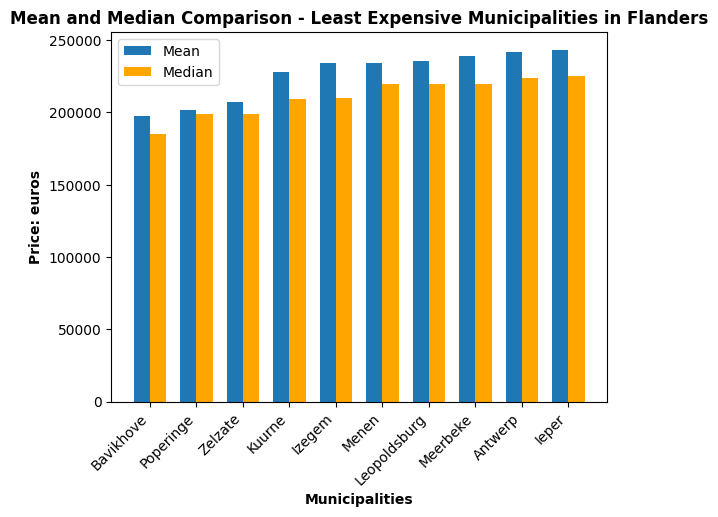

In [63]:
# Sort the postal codes by average  and median price in ascending order
least_expensive_postal_codes_average = flanders_mean_median.nsmallest(10, 'average_price')
least_expensive_postal_codes_median = flanders_mean_median.nsmallest(10, 'median_price')

# Set bar plot
labels = least_expensive_postal_codes_average.index
x = np.arange(len(labels))
fig, ax = plt.subplots()
width = 0.35
ax.bar(x - width/2, least_expensive_postal_codes_average['average_price'], width, label='Mean')
ax.bar(x + width/2, least_expensive_postal_codes_median['median_price'], width, label='Median', color='orange')
ax.set_xlabel('Municipalities', fontweight='bold')
ax.set_ylabel('Price: euros', fontweight='bold')
ax.set_title('Mean and Median Comparison - Least Expensive Municipalities in Flanders', fontweight='bold')
ax.set_xticks(ticks=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
ax.set_xticklabels(labels=['Bavikhove', 'Poperinge',
            'Zelzate', 'Kuurne', 'Izegem', 'Menen', 'Leopoldsburg', 'Meerbeke', 'Antwerp',
            'Ieper'], rotation=45, ha='right')
ax.legend()
plt.show()

Bar plot for price per square meter for least expensive municipalities for Flanders.

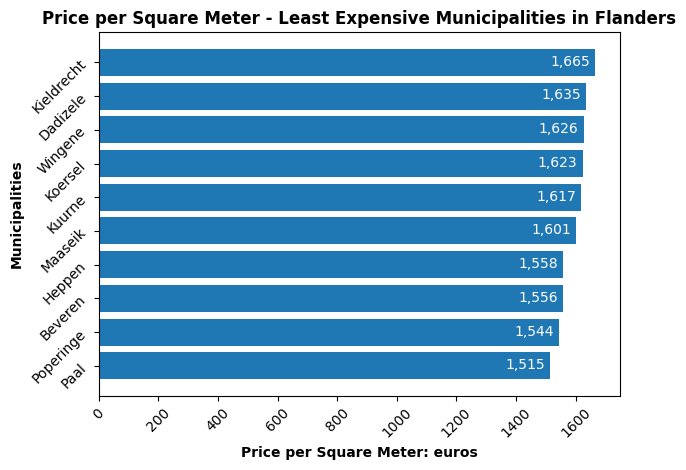

In [64]:
# Get the least expensive postal codes
least_expensive_postal_codes = flanders_mean_median_psqm.nsmallest(10, 'price_per_sqm')

# Extract the price per square meter values 
price_per_square_meter_values = least_expensive_postal_codes['price_per_sqm']

# Set bar plot
labels = least_expensive_postal_codes.index
fig, ax = plt.subplots()
width = 0.35
ax.barh(labels, price_per_square_meter_values)
ax.set_xlabel('Price per Square Meter: euros', fontweight='bold')
ax.set_ylabel('Municipalities', fontweight='bold')
ax.set_title('Price per Square Meter - Least Expensive Municipalities in Flanders', fontweight='bold')
ax.tick_params(axis='x', rotation=45)
ax.set_yticks(ticks=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
ax.set_yticklabels(labels=['Paal', "Poperinge",
            'Beveren', 'Heppen', 'Maaseik', 'Kuurne', 'Koersel', 'Wingene', 'Dadizele',
            'Kieldrecht'], rotation=45, ha='right')
for index, value in enumerate(price_per_square_meter_values):
    label = format(int(value), ',')
    plt.annotate(label, xy=(value-150, index-0.1), color='white')
plt.tight_layout()
plt.show()

Filter the dataset for Brussels.

In [65]:
brussels_dataset = immo_dataset[immo_dataset['region'] == 'Brussels']

Bar plot for mean and median for least expensive municipalities in Brussels.

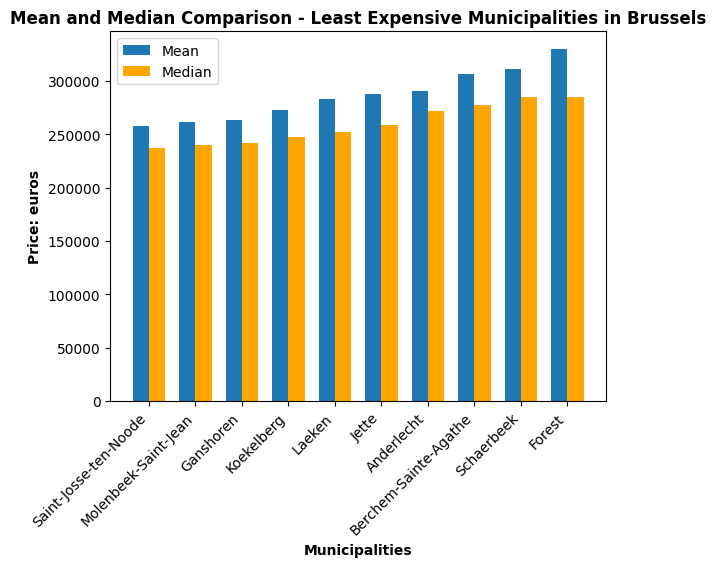

In [66]:
# Group by postal code and calculate the average price, median price
brussels_mean_median = brussels_dataset.groupby('postal_code').agg(
    average_price=('price', 'mean'),
    median_price=('price', 'median'),
)
# Sort the postal codes by average and median price in ascending order
least_expensive_postal_codes_average = brussels_mean_median.nsmallest(10, 'average_price')
least_expensive_postal_codes_median = brussels_mean_median.nsmallest(10, 'median_price')

# Set bar plot
labels = least_expensive_postal_codes_average.index
x = np.arange(len(labels))
fig, ax = plt.subplots()
width = 0.35
ax.bar(x - width/2, least_expensive_postal_codes_average['average_price'], width, label='Mean')
ax.bar(x + width/2, least_expensive_postal_codes_median['median_price'], width, label='Median', color='orange')
ax.set_xlabel('Municipalities', fontweight='bold')
ax.set_ylabel('Price: euros', fontweight='bold')
ax.set_title('Mean and Median Comparison - Least Expensive Municipalities in Brussels', fontweight='bold')
ax.set_xticks(ticks=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
ax.set_xticklabels(labels=['Saint-Josse-ten-Noode', 'Molenbeek-Saint-Jean',
            'Ganshoren', 'Koekelberg', 'Laeken', 'Jette', 'Anderlecht', 'Berchem-Sainte-Agathe', 'Schaerbeek',
            'Forest'], rotation=45, ha='right')
ax.legend()
plt.show()

Bar plot for price per square meter for least expensive municipalities in Brussels.

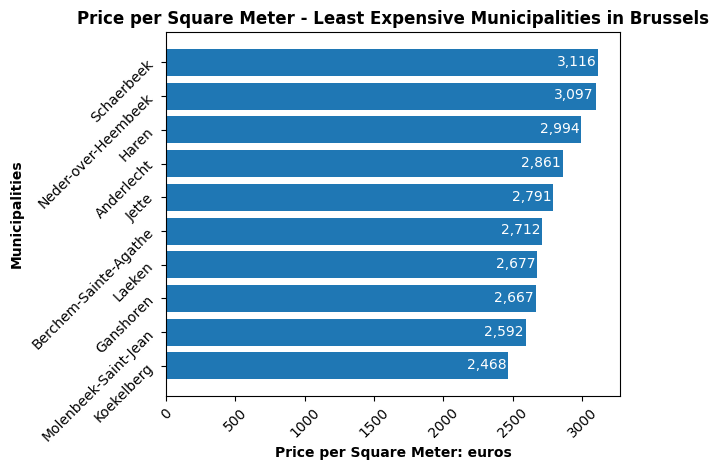

In [67]:
# Group by postal code and calculate the price per square meter
brussels_mean_median_psqm = brussels_dataset.groupby('postal_code').agg(
    average_price=('price', 'mean'),
    median_price=('price', 'median'),
    price_per_sqm=('price_per_sqm', 'mean')
)
# Get the least expensive postal codes
least_expensive_postal_codes = brussels_mean_median_psqm.nsmallest(10, 'price_per_sqm')

# Extract the price per square meter values 
price_per_square_meter_values = least_expensive_postal_codes['price_per_sqm']

# Set bar plot
labels = least_expensive_postal_codes.index
fig, ax = plt.subplots()
width = 0.35
ax.barh(labels, price_per_square_meter_values)
ax.set_xlabel('Price per Square Meter: euros', fontweight='bold')
ax.set_ylabel('Municipalities', fontweight='bold')
ax.set_title('Price per Square Meter - Least Expensive Municipalities in Brussels', fontweight='bold')
ax.tick_params(axis='x', rotation=45)
ax.set_yticks(ticks=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
ax.set_yticklabels(labels=['Koekelberg', "Molenbeek-Saint-Jean",
            'Ganshoren', 'Laeken', 'Berchem-Sainte-Agathe', 'Jette', 'Anderlecht', 'Haren', 'Neder-over-Heembeek',
            'Schaerbeek'], rotation=45, ha='right')
for index, value in enumerate(price_per_square_meter_values):
    label = format(int(value), ',')
    plt.annotate(label, xy=(value-300, index-0.1), color='white')
plt.tight_layout()
plt.show()

Bar plot for mean and median for most expensive municipalities in Brussels.

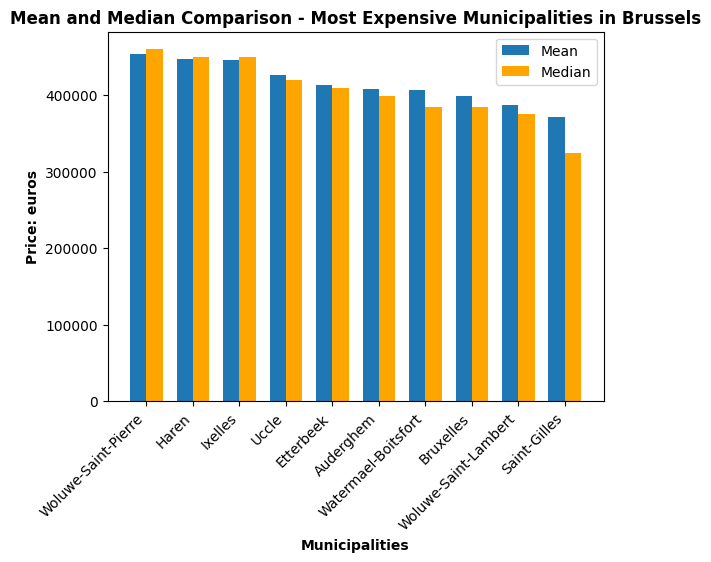

In [68]:
# Sort the postal codes by average and median price in ascending order
most_expensive_postal_codes_average = brussels_mean_median.nlargest(10, 'average_price')
most_expensive_postal_codes_median = brussels_mean_median.nlargest(10, 'median_price')

# Set bar plot
labels = most_expensive_postal_codes_average.index
x = np.arange(len(labels))
fig, ax = plt.subplots()
width = 0.35
ax.bar(x - width/2, most_expensive_postal_codes_average['average_price'], width, label='Mean')
ax.bar(x + width/2, most_expensive_postal_codes_median['median_price'], width, label='Median', color='orange')
ax.set_xlabel('Municipalities', fontweight='bold')
ax.set_ylabel('Price: euros', fontweight='bold')
ax.set_title('Mean and Median Comparison - Most Expensive Municipalities in Brussels', fontweight='bold')
ax.set_xticks(ticks=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
ax.set_xticklabels(labels=['Woluwe-Saint-Pierre', 'Haren',
            'Ixelles', 'Uccle', 'Etterbeek', 'Auderghem', 'Watermael-Boitsfort', 'Bruxelles', 'Woluwe-Saint-Lambert',
            'Saint-Gilles'], rotation=45, ha='right')
ax.legend()
plt.show()

Bar plot for price per square meter for most expensive municipalities in Brussels.

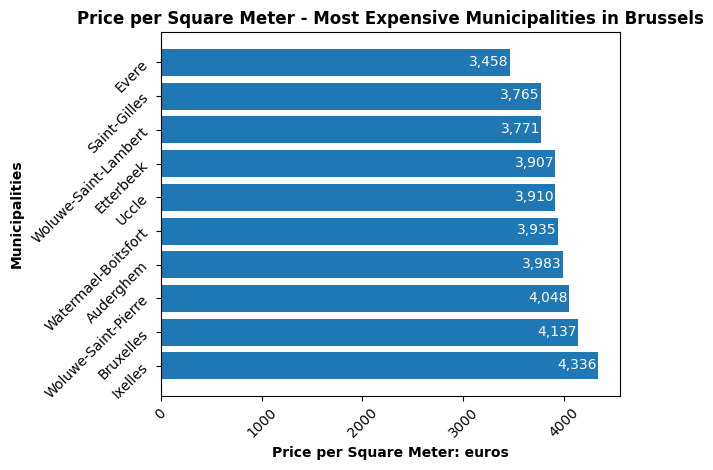

In [69]:
# Get the least expensive postal codes
most_expensive_postal_codes = brussels_mean_median_psqm.nlargest(10, 'price_per_sqm')

# Extract the price per square meter values 
price_per_square_meter_values = most_expensive_postal_codes['price_per_sqm']

# Set bar plot
labels = most_expensive_postal_codes.index
fig, ax = plt.subplots()
width = 0.35
ax.barh(labels, price_per_square_meter_values)
ax.set_xlabel('Price per Square Meter: euros', fontweight='bold')
ax.set_ylabel('Municipalities', fontweight='bold')
ax.set_title('Price per Square Meter - Most Expensive Municipalities in Brussels', fontweight='bold')
ax.tick_params(axis='x', rotation=45)
ax.set_yticks(ticks=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
ax.set_yticklabels(labels=['Ixelles', "Bruxelles",
            'Woluwe-Saint-Pierre', 'Auderghem', 'Watermael-Boitsfort', 'Uccle', 'Etterbeek', 'Woluwe-Saint-Lambert', 'Saint-Gilles',
            'Evere'], rotation=45, ha='right')
for index, value in enumerate(price_per_square_meter_values):
    label = format(int(value), ',')
    plt.annotate(label, xy=(value-400, index-0.1), color='white')
plt.tight_layout()
plt.show()

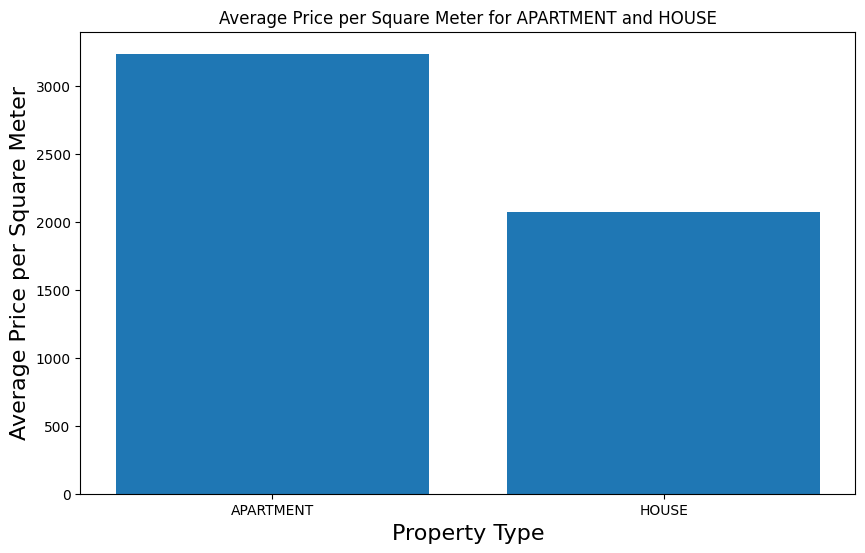

In [70]:
#Calculate price per square meter
#immo_dataset['price_per_sqm'] = immo_dataset['price'] / immo_dataset['habitable_surface']

#Calculate average price per square meter and standard deviation
average_price_per_sqm = immo_dataset.groupby('property_type')['price_per_sqm'].agg(['mean', 'std'])

#Get the values for APARTMENT
apartment_average_price = average_price_per_sqm.loc['APARTMENT', 'mean']
apartment_std_dev = average_price_per_sqm.loc['APARTMENT', 'std']

#Get the values for HOUSE
house_average_price = average_price_per_sqm.loc['HOUSE', 'mean']
house_std_dev = average_price_per_sqm.loc['HOUSE', 'std']

#Plot the average price per square meter with confidence indicators
plt.figure(figsize=(10, 6))
plt.bar(['APARTMENT', 'HOUSE'], [apartment_average_price, house_average_price])
plt.xlabel('Property Type', fontsize=16)
plt.ylabel('Average Price per Square Meter', fontsize=16)
plt.title('Average Price per Square Meter for APARTMENT and HOUSE')
plt.savefig('C:\becode_projects\challenge-data-analysis\Presentation\price_per_sqm_graph.jpg')
#Save the image as JPEG
plt.show()

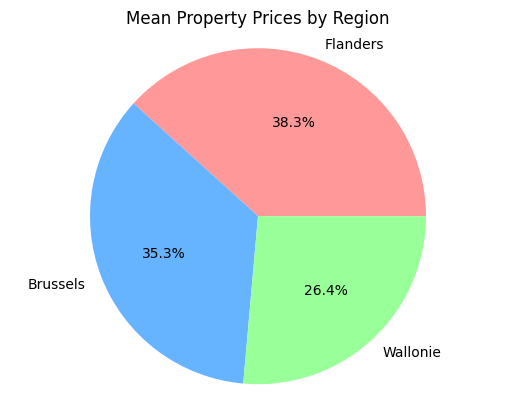

Average price per square meter for APARTMENT:  3239.688410284895
Average price per square meter for HOUSE:  2075.2780891857005


In [71]:
#Group the data by 'region' and calculate the mean price for each region
region_mean_prices = immo_dataset.groupby('region')['price'].mean()

#Define the labels and colors for the pie chart
labels = ['Flanders', 'Brussels', 'Wallonie']
colors = ['#ff9999', '#66b3ff', '#99ff99']

#Plot the pie chart
plt.pie(region_mean_prices, labels=labels, colors=colors, autopct='%1.1f%%')
plt.title('Mean Property Prices by Region')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle

plt.savefig(r"C:\becode_projects\challenge-data-analysis\regionwise_fig.jpg")

#Display the pie chart
plt.show()
immo_dataset['price_per_sqm'] = immo_dataset['price'] / immo_dataset['habitable_surface']

average_price_per_sqm = immo_dataset.groupby('property_type')['price_per_sqm'].mean()

apartment_average_price = average_price_per_sqm.loc['APARTMENT']
house_average_price = average_price_per_sqm.loc['HOUSE']

print("Average price per square meter for APARTMENT: ", apartment_average_price)
print("Average price per square meter for HOUSE: ", house_average_price)

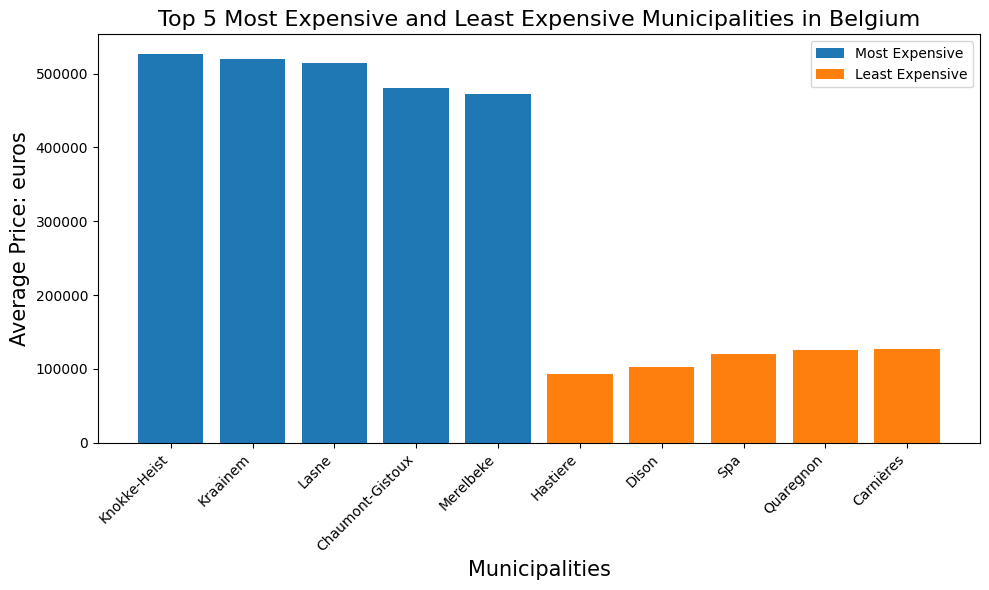

In [195]:
#Filter the dataset for the Flanders region
#brussels_dataset = immo_dataset[immo_dataset['region'] == 'Brussels']

#Group by postal code and calculate the average price
postal_code_stats = immo_dataset.groupby('postal_code')['price'].mean()

#Sort the postal codes based on the average price in descending order
top_5_expensive_postal_codes = postal_code_stats.nlargest(5)
top_5_least_expensive_postal_codes = postal_code_stats.nsmallest(5)

#Plotting the top 5 most expensive and least expensive postal codes in Flanders
plt.figure(figsize=(10, 6))
plt.bar(top_5_expensive_postal_codes.index, top_5_expensive_postal_codes.values, label='Most Expensive')
plt.bar(top_5_least_expensive_postal_codes.index, top_5_least_expensive_postal_codes.values, label='Least Expensive')
plt.xlabel('Municipalities', fontsize=15)
plt.ylabel('Average Price: euros', fontsize=15)
plt.title('Top 5 Most Expensive and Least Expensive Municipalities in Belgium', fontsize=16)
plt.legend()
plt.xticks(ticks=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9], labels=['Knokke-Heist', 'Kraainem', 'Lasne', 'Chaumont-Gistoux', 'Merelbeke',
                  'Hastiere', 'Dison', 'Spa', 'Quaregnon', 'Carnières'])
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.savefig('top_5_postal_codes_flanders.jpg')  # Save the image as JPEG
plt.show()

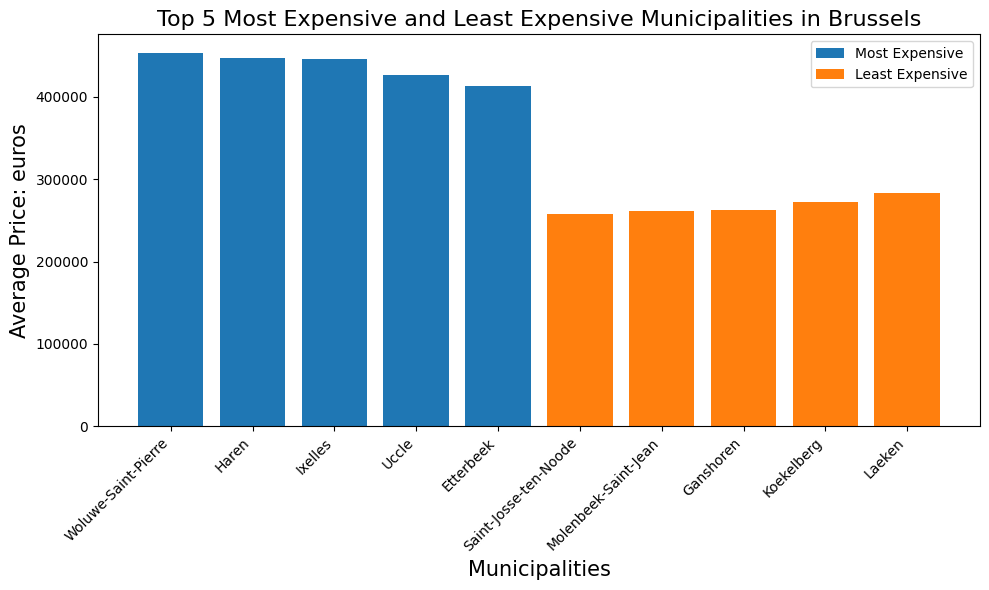

In [194]:
#Filter the dataset for the Flanders region
brussels_dataset = immo_dataset[immo_dataset['region'] == 'Brussels']

#Group by postal code and calculate the average price
postal_code_stats = brussels_dataset.groupby('postal_code')['price'].mean()

#Sort the postal codes based on the average price in descending order
top_5_expensive_postal_codes = postal_code_stats.nlargest(5)
top_5_least_expensive_postal_codes = postal_code_stats.nsmallest(5)

#Plotting the top 5 most expensive and least expensive postal codes in Flanders
plt.figure(figsize=(10, 6))
plt.bar(top_5_expensive_postal_codes.index, top_5_expensive_postal_codes.values, label='Most Expensive')
plt.bar(top_5_least_expensive_postal_codes.index, top_5_least_expensive_postal_codes.values, label='Least Expensive')
plt.xlabel('Municipalities', fontsize=15)
plt.ylabel('Average Price: euros', fontsize=15)
plt.title('Top 5 Most Expensive and Least Expensive Municipalities in Brussels', fontsize=16)
plt.legend()
plt.xticks(rotation=45, ha="right")
plt.xticks(ticks=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9], labels=['Woluwe-Saint-Pierre', 'Haren', 'Ixelles', 'Uccle', 'Etterbeek',
                  'Saint-Josse-ten-Noode', 'Molenbeek-Saint-Jean', 'Ganshoren', 'Koekelberg', 'Laeken'])
plt.tight_layout()
plt.savefig('top_5_postal_codes_flanders.jpg')  # Save the image as JPEG
plt.show()

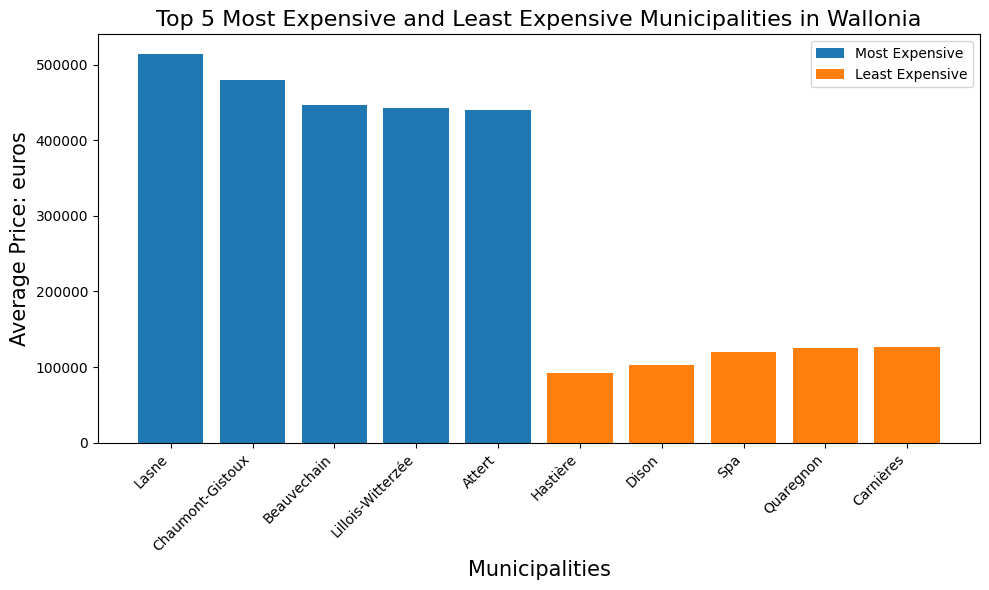

In [193]:
#Filter the dataset for the Flanders region
wallonie_dataset = immo_dataset[immo_dataset['region'] == 'Wallonie']

#Group by postal code and calculate the average price
postal_code_stats = wallonie_dataset.groupby('postal_code')['price'].mean()

#Sort the postal codes based on the average price in descending order
top_5_expensive_postal_codes = postal_code_stats.nlargest(5)
top_5_least_expensive_postal_codes = postal_code_stats.nsmallest(5)

#Plotting the top 5 most expensive and least expensive postal codes in Flanders
plt.figure(figsize=(10, 6))
plt.bar(top_5_expensive_postal_codes.index, top_5_expensive_postal_codes.values, label='Most Expensive')
plt.bar(top_5_least_expensive_postal_codes.index, top_5_least_expensive_postal_codes.values, label='Least Expensive')
plt.xlabel('Municipalities', fontsize=15)
plt.ylabel('Average Price: euros', fontsize=15)
plt.title('Top 5 Most Expensive and Least Expensive Municipalities in Wallonia', fontsize=16)
plt.legend()
plt.xticks(rotation=45, ha="right")
plt.xticks(ticks=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9], labels=['Lasne', 'Chaumont-Gistoux', 'Beauvechain', 'Lillois-Witterzée', 'Attert',
                  'Hastière', 'Dison', 'Spa', 'Quaregnon', 'Carnières'])
plt.tight_layout()
plt.savefig('top_5_postal_codes_flanders.jpg')  # Save the image as JPEG
plt.show()

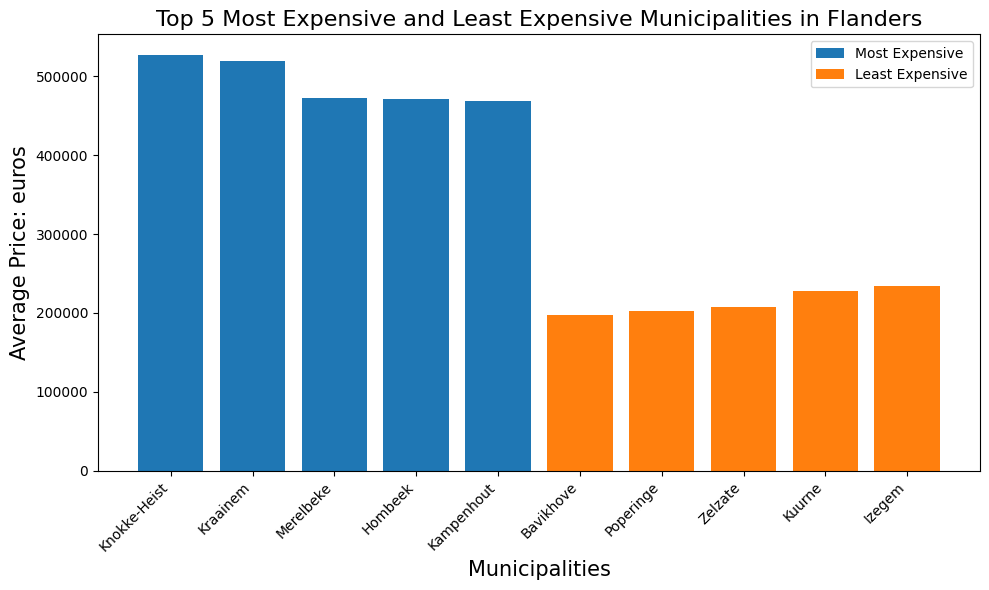

In [192]:
#Filter the dataset for the Flanders region
flanders_dataset = immo_dataset[immo_dataset['region'] == 'Flanders']

#Group by postal code and calculate the average price
postal_code_stats = flanders_dataset.groupby('postal_code')['price'].mean()

#Sort the postal codes based on the average price in descending order
top_5_expensive_postal_codes = postal_code_stats.nlargest(5)
top_5_least_expensive_postal_codes = postal_code_stats.nsmallest(5)

#Plotting the top 5 most expensive and least expensive postal codes in Flanders
plt.figure(figsize=(10, 6))
plt.bar(top_5_expensive_postal_codes.index, top_5_expensive_postal_codes.values, label='Most Expensive')
plt.bar(top_5_least_expensive_postal_codes.index, top_5_least_expensive_postal_codes.values, label='Least Expensive')
plt.xlabel('Municipalities', fontsize=15)
plt.ylabel('Average Price: euros', fontsize=15)
plt.title('Top 5 Most Expensive and Least Expensive Municipalities in Flanders', fontsize=16)
plt.legend()
plt.xticks(rotation=45, ha="right")
plt.xticks(ticks=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9], labels=['Knokke-Heist', 'Kraainem', 'Merelbeke', 'Hombeek', 'Kampenhout',
                  'Bavikhove', 'Poperinge', 'Zelzate', 'Kuurne', 'Izegem'])
plt.tight_layout()
plt.savefig('top_5_postal_codes_flanders.jpg')  # Save the image as JPEG
plt.show()

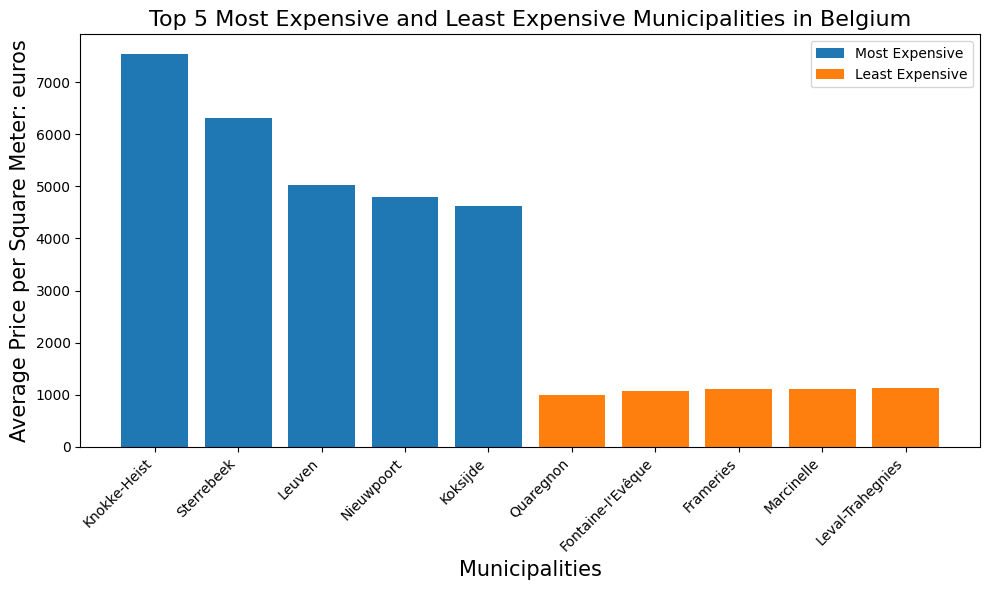

In [191]:
#Calculate price per square meter
immo_dataset['price_per_sqm'] = immo_dataset['price'] / immo_dataset['habitable_surface']

#Filter the dataset for the Flanders region
#brussels_dataset = immo_dataset[immo_dataset['region'] == 'Brussels']

#Group by postal code and calculate the average price per square meter
postal_code_stats = immo_dataset.groupby('postal_code')['price_per_sqm'].mean()

#Sort the postal codes based on the average price per square meter in descending order
top_5_expensive_postal_codes = postal_code_stats.nlargest(5)
top_5_least_expensive_postal_codes = postal_code_stats.nsmallest(5)

#Plotting the top 5 most expensive and least expensive postal codes in Flanders
plt.figure(figsize=(10, 6))
plt.bar(top_5_expensive_postal_codes.index, top_5_expensive_postal_codes.values, label='Most Expensive')
plt.bar(top_5_least_expensive_postal_codes.index, top_5_least_expensive_postal_codes.values, label='Least Expensive')
plt.xlabel('Municipalities', fontsize=15)
plt.ylabel('Average Price per Square Meter: euros', fontsize=15)
plt.title('Top 5 Most Expensive and Least Expensive Municipalities in Belgium', fontsize=16)
plt.legend()
plt.xticks(rotation=45, ha="right")
plt.xticks(ticks=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9], labels=['Knokke-Heist', 'Sterrebeek', 'Leuven', 'Nieuwpoort', 'Koksijde',
                  'Quaregnon', "Fontaine-l'Evêque", 'Frameries', 'Marcinelle', 'Leval-Trahegnies'])
plt.tight_layout()
plt.savefig('top_5_price_per_sqm.jpg')  # Save the image as JPEG
plt.show()

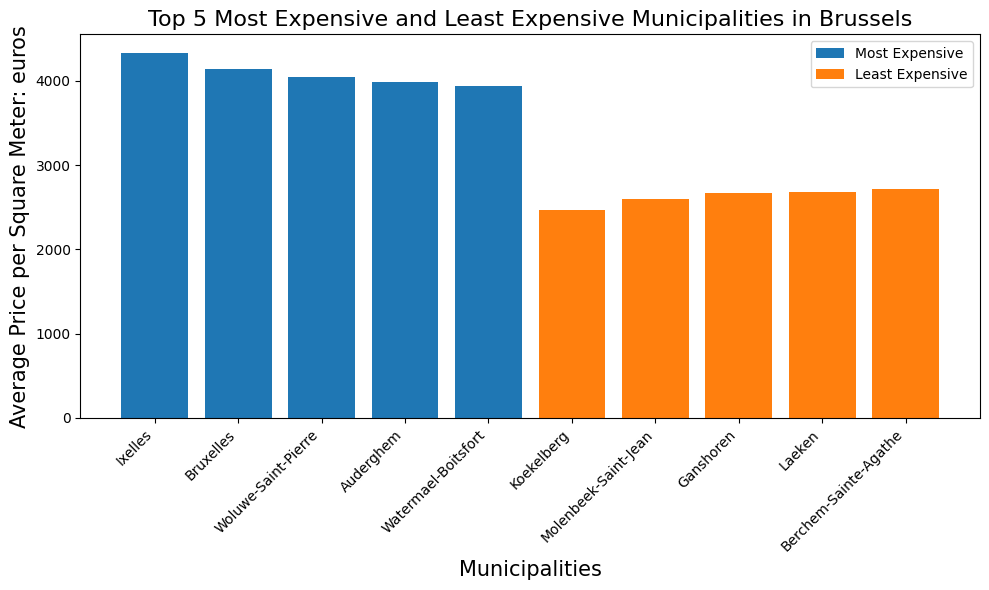

In [190]:
#Calculate price per square meter
immo_dataset['price_per_sqm'] = immo_dataset['price'] / immo_dataset['habitable_surface']

#Filter the dataset for the Flanders region
brussels_dataset = immo_dataset[immo_dataset['region'] == 'Brussels']

#Group by postal code and calculate the average price per square meter
postal_code_stats = brussels_dataset.groupby('postal_code')['price_per_sqm'].mean()

#Sort the postal codes based on the average price per square meter in descending order
top_5_expensive_postal_codes = postal_code_stats.nlargest(5)
top_5_least_expensive_postal_codes = postal_code_stats.nsmallest(5)

#Plotting the top 5 most expensive and least expensive postal codes in Flanders
plt.figure(figsize=(10, 6))
plt.bar(top_5_expensive_postal_codes.index, top_5_expensive_postal_codes.values, label='Most Expensive')
plt.bar(top_5_least_expensive_postal_codes.index, top_5_least_expensive_postal_codes.values, label='Least Expensive')
plt.xlabel('Municipalities', fontsize=15)
plt.ylabel('Average Price per Square Meter: euros', fontsize=15)
plt.title('Top 5 Most Expensive and Least Expensive Municipalities in Brussels', fontsize=16)
plt.legend()
plt.xticks(rotation=45, ha="right")
plt.xticks(ticks=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9], labels=['Ixelles', 'Bruxelles', 'Woluwe-Saint-Pierre', 'Auderghem', 'Watermael-Boitsfort',
                  'Koekelberg', "Molenbeek-Saint-Jean", 'Ganshoren', 'Laeken', 'Berchem-Sainte-Agathe'])
plt.tight_layout()
plt.savefig('top_5_price_per_sqm.jpg')  # Save the image as JPEG
plt.show()

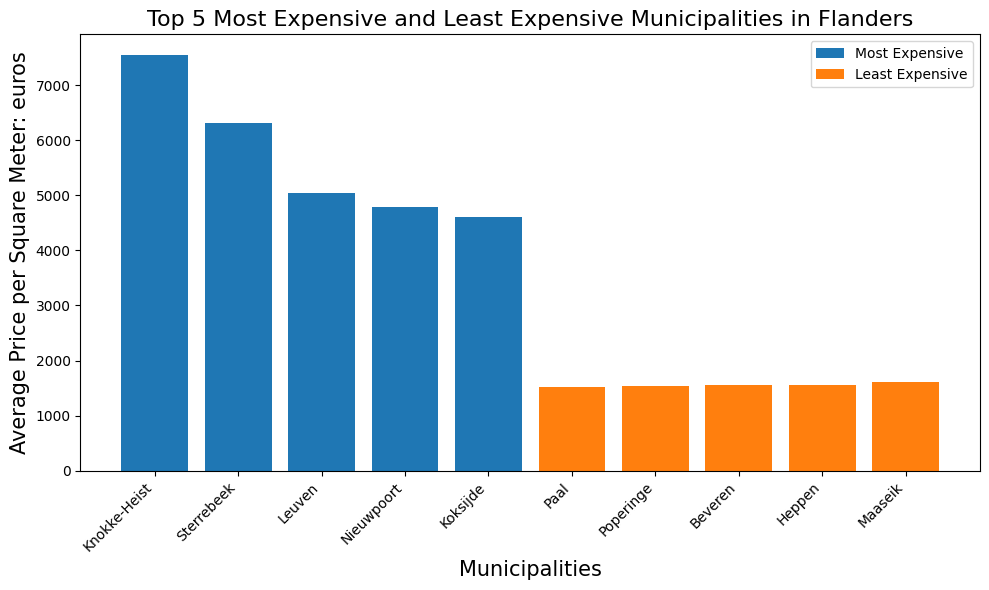

In [189]:
#Calculate price per square meter
immo_dataset['price_per_sqm'] = immo_dataset['price'] / immo_dataset['habitable_surface']

#Filter the dataset for the Flanders region
flanders_dataset = immo_dataset[immo_dataset['region'] == 'Flanders']

#Group by postal code and calculate the average price per square meter
postal_code_stats = flanders_dataset.groupby('postal_code')['price_per_sqm'].mean()

#Sort the postal codes based on the average price per square meter in descending order
top_5_expensive_postal_codes = postal_code_stats.nlargest(5)
top_5_least_expensive_postal_codes = postal_code_stats.nsmallest(5)

#Plotting the top 5 most expensive and least expensive postal codes in Flanders
plt.figure(figsize=(10, 6))
plt.bar(top_5_expensive_postal_codes.index, top_5_expensive_postal_codes.values, label='Most Expensive')
plt.bar(top_5_least_expensive_postal_codes.index, top_5_least_expensive_postal_codes.values, label='Least Expensive')
plt.xlabel('Municipalities', fontsize=15)
plt.ylabel('Average Price per Square Meter: euros', fontsize=15)
plt.title('Top 5 Most Expensive and Least Expensive Municipalities in Flanders', fontsize=16)
plt.legend()
plt.xticks(rotation=45, ha="right")
plt.xticks(ticks=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9], labels=['Knokke-Heist', 'Sterrebeek', 'Leuven', 'Nieuwpoort', 'Koksijde',
                  'Paal', "Poperinge", 'Beveren', 'Heppen', 'Maaseik'])
plt.tight_layout()
plt.savefig('top_5_price_per_sqm.jpg')  # Save the image as JPEG
plt.show()

In [171]:
match_municipality('7134')

                         locality postal_code
2808          Péronnes-lez-Binche        7134
6099          Péronnes-lez-Binche        7134
6137             LEVAL-TRAHEGNIES        7134
6910             Leval-Trahegnies        7134
7774             LEVAL-TRAHEGNIES        7134
8312             Leval-Trahegnies        7134
8610   Binche Péronnes-lez-Binche        7134
9937             Leval-trahegnies        7134
12120            Leval-Trahegnies        7134
14151                     RESSAIX        7134


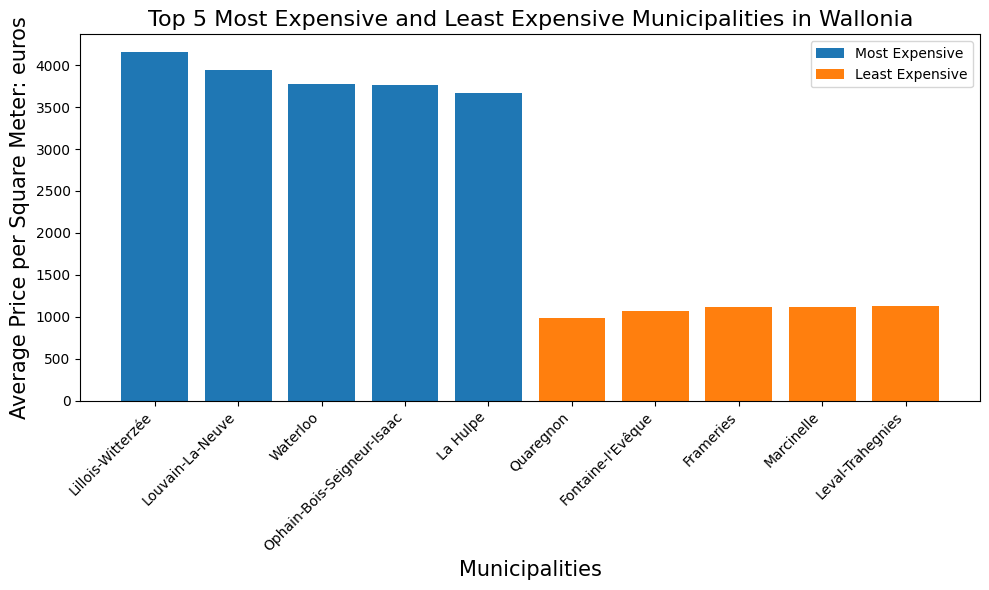

In [188]:
#Calculate price per square meter
immo_dataset['price_per_sqm'] = immo_dataset['price'] / immo_dataset['habitable_surface']

#Filter the dataset for the Flanders region
wallonia_dataset = immo_dataset[immo_dataset['region'] == 'Wallonie']

#Group by postal code and calculate the average price per square meter
postal_code_stats = wallonia_dataset.groupby('postal_code')['price_per_sqm'].mean()

#Sort the postal codes based on the average price per square meter in descending order
top_5_expensive_postal_codes = postal_code_stats.nlargest(5)
top_5_least_expensive_postal_codes = postal_code_stats.nsmallest(5)

#Plotting the top 5 most expensive and least expensive postal codes in Flanders
plt.figure(figsize=(10, 6))
plt.bar(top_5_expensive_postal_codes.index, top_5_expensive_postal_codes.values, label='Most Expensive')
plt.bar(top_5_least_expensive_postal_codes.index, top_5_least_expensive_postal_codes.values, label='Least Expensive')
plt.xlabel('Municipalities', fontsize=15)
plt.ylabel('Average Price per Square Meter: euros', fontsize=15)
plt.title('Top 5 Most Expensive and Least Expensive Municipalities in Wallonia', fontsize=16)
plt.legend()
plt.xticks(rotation=45, ha="right")
plt.xticks(ticks=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9], labels=['Lillois-Witterzée', 'Louvain-La-Neuve', 'Waterloo', 'Ophain-Bois-Seigneur-Isaac', 'La Hulpe',
                  'Quaregnon', "Fontaine-l'Evêque", 'Frameries', 'Marcinelle', 'Leval-Trahegnies'])
plt.tight_layout()
plt.savefig('top_5_price_per_sqm.jpg')  # Save the image as JPEG
plt.show()